In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
#we use 3 datasets for this project.
feature = pd.read_csv("/Users/amelie/Desktop/167PS2023/project/features.csv")
feature.info()
stores = pd.read_csv("/Users/amelie/Desktop/167PS2023/project/stores.csv")
stores.info()
#test = pd.read_csv("/Users/amelie/Desktop/167PS2023/project/test.csv")
#display(test)
train = pd.read_csv("/Users/amelie/Desktop/167PS2023/project/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Typ

**Data Wrangling and Data Process**

In [2]:
df = train.merge(feature, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df.head(5)
#display(df)
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
df.info()
print(df['Store'].nunique())# number of different values 45 stores
print(df['Type'].nunique()) # number of different values 3 types
df['Dept'].nunique() # number of different values 81 departments

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
45
3


81

In [3]:
#check some weired value
df.describe() 

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

In [4]:
df.loc[df['Weekly_Sales']<=0]#1358 row

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
188         1    47  2010-02-19       -863.00      False        39.93   
406         1    47  2010-03-12       -698.00      False        57.79   
2549        1    47  2010-10-08        -58.00      False        63.93   
3632        1    54  2011-01-21        -50.00      False        44.04   
4132        1    47  2011-03-11          0.00      False        53.56   
...       ...   ...         ...           ...        ...          ...   
420066     45    49  2012-05-25         -4.97      False        67.21   
420403     45    49  2012-06-29        -34.00      False        75.22   
420736     45    49  2012-08-03         -1.91      False        76.58   
421007     45    54  2012-08-31          0.00      False        75.09   
421142     45    49  2012-09-14         -6.83      False        67.87   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
188          2.514        NaN        NaN        NaN        NaN        NaN   
406          2.667        NaN        NaN        NaN        NaN        NaN   
2549         2.633        NaN        NaN        NaN        NaN        NaN   
3632         3.016        NaN        NaN        NaN        NaN        NaN   
4132         3.459        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
420066       3.798    5370.39        NaN     361.22    1287.62    2461.81   
420403       3.506    3291.36     425.60        NaN     314.88    2255.34   
420736       3.654   24853.05      39.56      17.96   11142.69    2768.32   
421007       3.867   23641.30       6.00      92.93    6988.31    3992.13   
421142       3.948   11407.95        NaN       4.30    3421.72    5268.92   

               CPI  Unemployment Type    Size  
188     211.289143         8.106    A  151315  
406     211.380643         8.106    A  151315  
2549    211.746754         7.838    A  151315  
3632    211.827234         7.742    A  151315  
4132    214.111056         7.742    A  151315  
...            ...           ...  ...     ...  
420066  191.002810         8.567    B  118221  
420403  191.099246         8.567    B  118221  
420736  191.164090         8.684    B  118221  
421007  191.461281         8.684    B  118221  
421142  191.699850         8.684    B  118221  

[1358 rows x 16 columns]

In [5]:
df = df.loc[df['Weekly_Sales'] > 0]# new datashape #420212 rows × 16 columns
df

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1  2010-02-05      24924.50      False        42.31   
1           1     2  2010-02-05      50605.27      False        42.31   
2           1     3  2010-02-05      13740.12      False        42.31   
3           1     4  2010-02-05      39954.04      False        42.31   
4           1     5  2010-02-05      32229.38      False        42.31   
...       ...   ...         ...           ...        ...          ...   
421565     45    93  2012-10-26       2487.80      False        58.85   
421566     45    94  2012-10-26       5203.31      False        58.85   
421567     45    95  2012-10-26      56017.47      False        58.85   
421568     45    97  2012-10-26       6817.48      False        58.85   
421569     45    98  2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.096358         8.106    A  151315  
2       211.096358         8.106    A  151315  
3       211.096358         8.106    A  151315  
4       211.096358         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.308899         8.667    B  118221  
421566  192.308899         8.667    B  118221  
421567  192.308899         8.667    B  118221  
421568  192.308899         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[420212 rows x 16 columns]

In [6]:
print(df.isna().sum())#check missing values

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


In [7]:
df = df.drop_duplicates()#check duplicate values
display(df)#no duplicates

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1  2010-02-05      24924.50      False        42.31   
1           1     2  2010-02-05      50605.27      False        42.31   
2           1     3  2010-02-05      13740.12      False        42.31   
3           1     4  2010-02-05      39954.04      False        42.31   
4           1     5  2010-02-05      32229.38      False        42.31   
...       ...   ...         ...           ...        ...          ...   
421565     45    93  2012-10-26       2487.80      False        58.85   
421566     45    94  2012-10-26       5203.31      False        58.85   
421567     45    95  2012-10-26      56017.47      False        58.85   
421568     45    97  2012-10-26       6817.48      False        58.85   
421569     45    98  2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.096358         8.106    A  151315  
2       211.096358         8.106    A  151315  
3       211.096358         8.106    A  151315  
4       211.096358         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.308899         8.667    B  118221  
421566  192.308899         8.667    B  118221  
421567  192.308899         8.667    B  118221  
421568  192.308899         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[420212 rows x 16 columns]

In [8]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month 
df['year'] = df['Date'].dt.year
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
display(monthly_sales)
display(df)

year           2010          2011          2012
month                                          
1               NaN  14054.378885  14308.409638
2      16123.339183  15906.833033  16114.205186
3      15480.222209  15245.219561  15626.987004
4      15786.479121  15403.855679  15948.226550
5      16063.976174  15425.362450  16050.428765
6      16551.606753  16267.355096  16379.278462
7      16009.268745  15774.614002  15939.415690
8      16205.333619  16088.169620  16062.301274
9      15172.175282  15018.049242  15283.248527
10     14839.055563  15536.033513  15567.236930
11     17363.277836  17703.931735           NaN
12     19642.617795  19213.216307           NaN

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     2 2010-02-05      50605.27      False        42.31   
2           1     3 2010-02-05      13740.12      False        42.31   
3           1     4 2010-02-05      39954.04      False        42.31   
4           1     5 2010-02-05      32229.38      False        42.31   
...       ...   ...        ...           ...        ...          ...   
421565     45    93 2012-10-26       2487.80      False        58.85   
421566     45    94 2012-10-26       5203.31      False        58.85   
421567     45    95 2012-10-26      56017.47      False        58.85   
421568     45    97 2012-10-26       6817.48      False        58.85   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  week  month  year  
0       211.096358         8.106    A  151315     5      2  2010  
1       211.096358         8.106    A  151315     5      2  2010  
2       211.096358         8.106    A  151315     5      2  2010  
3       211.096358         8.106    A  151315     5      2  2010  
4       211.096358         8.106    A  151315     5      2  2010  
...            ...           ...  ...     ...   ...    ...   ...  
421565  192.308899         8.667    B  118221    43     10  2012  
421566  192.308899         8.667    B  118221    43     10  2012  
421567  192.308899         8.667    B  118221    43     10  2012  
421568  192.308899         8.667    B  118221    43     10  2012  
421569  192.308899         8.667    B  118221    43     10  2012  

[420212 rows x 19 columns]

**Data Visulization and Exploratory Data Analysis**

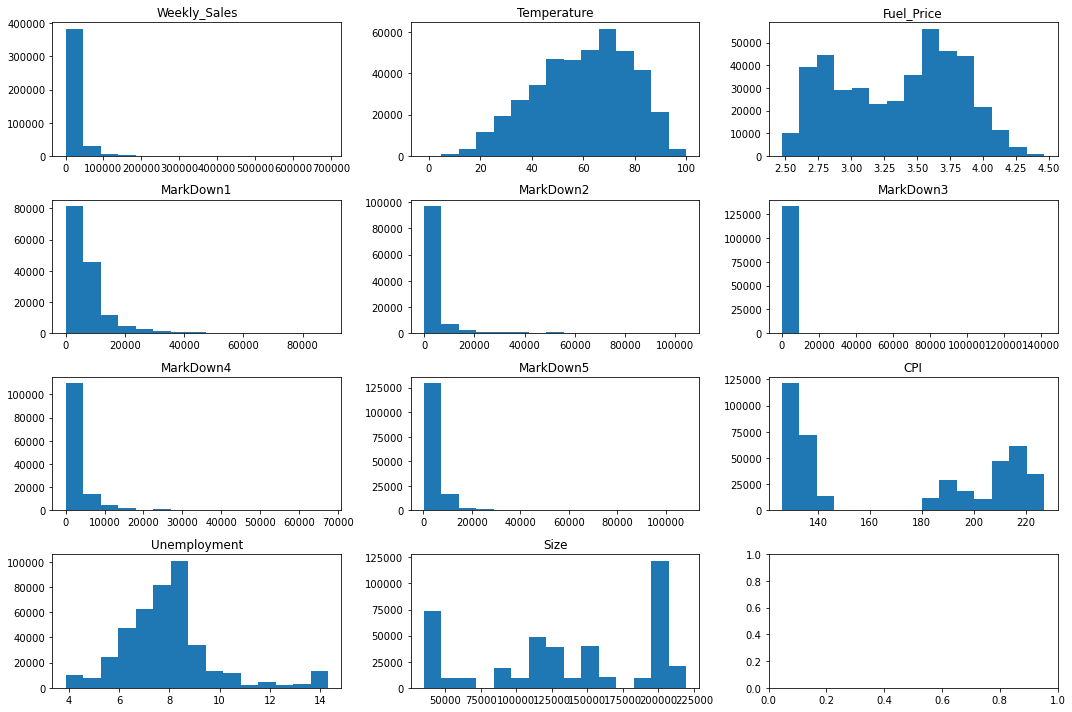

In [9]:
#histograms of numeric columns in df
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# loop through each column and create a histogram
columns = ["Weekly_Sales",'Temperature', 'Fuel_Price', 'MarkDown1',
           'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']

for i, column in enumerate(columns):
    ax = axes[i//3, i%3] # get the subplot axis
    ax.hist(df[column], bins=15) # create the histogram
    ax.set_title(column) # set the title
    
plt.tight_layout() # adjust the spacing between subplots
plt.show() # display the plot

From the above histograms, we can observe the following patterns:

The distribution of weekly sales is skewed to the right, indicating that the majority of weekly sales fall below 1 million USD. However, there are a few instances where sales exceed this threshold.

The distribution of temperature follows an approximately normal pattern, suggesting that the temperatures are evenly spread across the range with no significant bias towards higher or lower values.

The distribution of fuel price exhibits a bimodal pattern, indicating that there are two distinct peaks or modes in the data. This suggests that there are two prevailing price levels for fuel, possibly corresponding to different market conditions or factors.

The Consumer Price Index (CPI) forms three distinct clusters, suggesting the presence of two three groups or categories within the data. This implies that there are three sets of price levels or inflation rates that can be observed.

The unemployment rate distribution appears to be close to a normal distribution, indicating that the majority of the data points cluster around the mean value with relatively fewer extreme values.

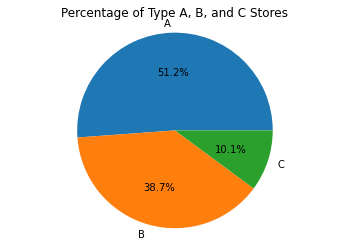

In [10]:
#percentage of types

# Filter the DataFrame to include only 'Type' and 'Store' columns
df_filtered = df[['Type', 'Store']]

# Calculate the count of each store type
type_counts = df_filtered['Type'].value_counts()

# Create a pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Type A, B, and C Stores')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Display the chart
plt.show()

Type  Weekly_Sales
0    A  4.331057e+09
1    B  2.000742e+09
2    C  4.055080e+08

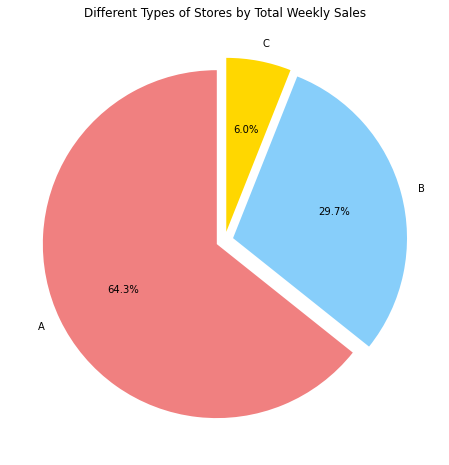

In [11]:
df0 = df.groupby(['Type'])['Weekly_Sales'].sum().reset_index()
display(df0)

# Create the plot using seaborn
fig, ax = plt.subplots(figsize=(8,8))
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.05, 0.05, 0.05)
ax.pie(df0['Weekly_Sales'], labels=df0['Type'], colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

# Set the title
ax.set_title('Different Types of Stores by Total Weekly Sales')

# Show the plot
plt.show()

Based on our bar graph, it is evident that Type 'A' stores exhibit the highest sales compared to the other two store types. This observation suggests a clear relationship between the type of the store and their corresponding sales performance. Furthermore, Type 'B' stores, with the second-highest number of stores, also display average sales that support this assumption.

Having analyzed the average sales for each store type, the subsequent area of interest lies in examining the sales figures for each department associated with these stores.

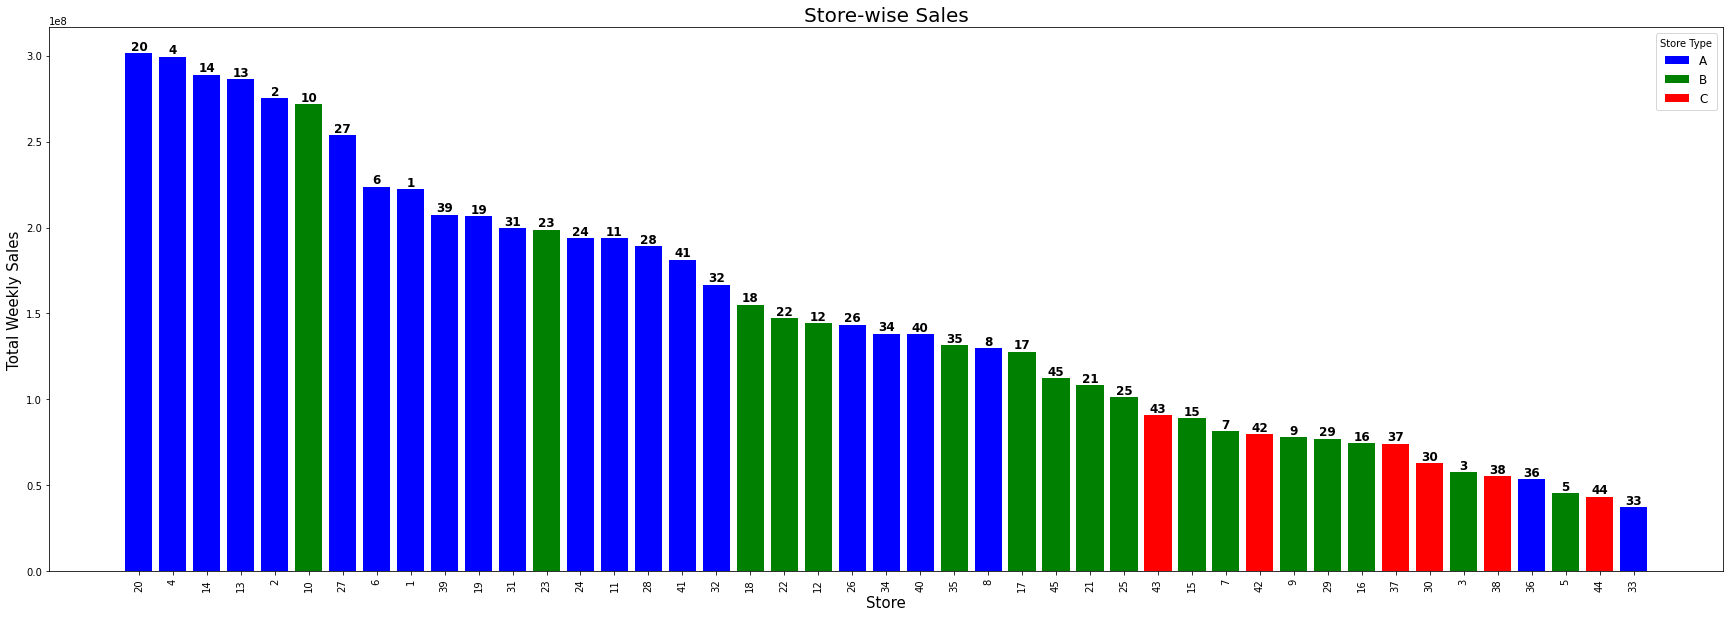

In [12]:
#Store-side sale
df2 = df.groupby(['Store','Type'])['Weekly_Sales'].sum().reset_index()
df2 = df2.sort_values(by='Weekly_Sales', ascending=False)
#display(df2)
fig, ax = plt.subplots(figsize=(30,10))
colors = {'A': 'blue', 'B': 'green', 'C': 'red'}

for i, (store, store_type, sales) in enumerate(zip(df2['Store'], df2['Type'], df2['Weekly_Sales'])):
    ax.bar(i, sales, color=colors[store_type], label=store_type if store_type not in ax.get_legend_handles_labels()[1] else "")
    ax.text(i, sales, store, ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('Store-wise Sales', fontsize=20)
ax.set_xlabel('Store', fontsize=15)
ax.set_ylabel('Total Weekly Sales', fontsize=15)
ax.legend(title='Store Type', loc='upper right', fontsize=12)
plt.xticks(range(len(df2)), df2['Store'], rotation=90)
plt.show()

In the Walmart dataset, a total of 45 stores are presented. From the image below, it is apparent that store numbers 20, 4, 14, and 13 have the highest total sales. Notably, there is a significant disparity in the total sales across the different stores. While certain stores record substantial sales figures, others demonstrate a considerable lack in this area.

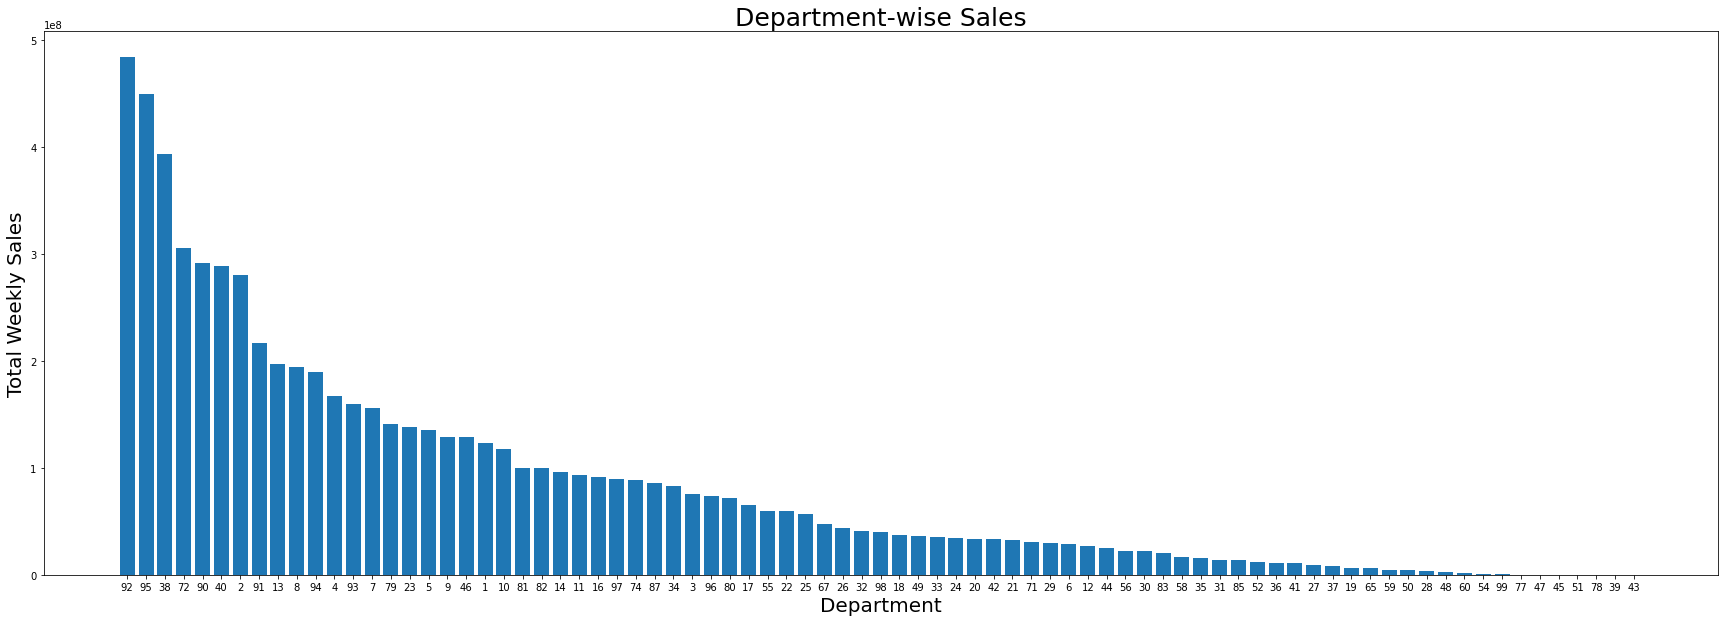

In [13]:
#department-side sale
df1 = df.groupby(['Dept'])['Weekly_Sales'].sum().reset_index()
df1 = df1.sort_values(by='Weekly_Sales', ascending=False)
#display(df1)
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x=range(len(df1)), height=df1['Weekly_Sales'])
ax.set_title('Department-wise Sales',fontsize=25)
ax.set_xticks(range(len(df1)))
ax.set_xticklabels(df1['Dept'])
ax.set_xlabel('Department',fontsize=20)
ax.set_ylabel('Total Weekly Sales',fontsize=20)

plt.show()

81
80
80


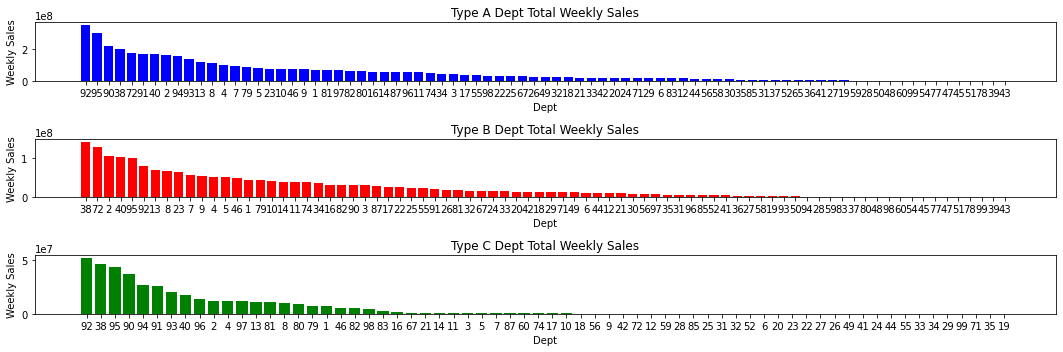

In [14]:
#Identifying Specific Stores and Departments with Highest Sales
# Filter data by store type and calculate mean weekly sales
df1 = df.groupby(['Dept','Type'])['Weekly_Sales'].sum().reset_index()
df1 = df1.sort_values(by='Weekly_Sales', ascending=False)
#display(df1)
df_A = df1[df1['Type'] == 'A'].sort_values('Weekly_Sales', ascending=False)
print(df_A.Dept.nunique())
df_B = df1[df1['Type'] == 'B'].sort_values('Weekly_Sales', ascending=False)
print(df_B.Dept.nunique())
df_C = df1[df1['Type'] == 'C'].sort_values('Weekly_Sales', ascending=False)
print(df_B.Dept.nunique())
fig, axs = plt.subplots(3, 1, figsize=(15, 5))

# Plot type A store total weekly sales
axs[0].bar(x=range(len(df_A)), height=df_A['Weekly_Sales'], color='blue')
axs[0].set_title('Type A Dept Total Weekly Sales')
axs[0].set_xticks(range(len(df_A)))
axs[0].set_xticklabels(df_A['Dept'])
axs[0].set_xlabel('Dept')
axs[0].set_ylabel('Weekly Sales')

# Plot type B store total weekly sales
axs[1].bar(x=range(len(df_B)), height=df_B['Weekly_Sales'], color='red')
axs[1].set_title('Type B Dept Total Weekly Sales')
axs[1].set_xticks(range(len(df_B)))
axs[1].set_xticklabels(df_B['Dept'])
axs[1].set_xlabel('Dept')
axs[1].set_ylabel('Weekly Sales')

# Plot type C store total weekly sales
axs[2].bar(x=range(len(df_C)), height=df_C['Weekly_Sales'], color='green')
axs[2].set_title('Type C Dept Total Weekly Sales')
axs[2].set_xticks(range(len(df_C)))
axs[2].set_xticklabels(df_C['Dept'])
axs[2].set_xlabel('Dept')
axs[2].set_ylabel('Weekly Sales')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

From the image depicted above, it can be identified that Departmentnumber 92 has the highest number of total sales.
As observed in the figure, it is certain that departments 92, 95, 38, 72 and 90 are the top revenue generating departments across all the three store types. Although there is no information in this dataset about the nature of these departments, it is still safe to establish that Walmart can increase revenue by including the above mentioned departments in their stores. 

In conclusion, for all store types listed in this study, departments 95, 92, 38, 90, and 72 generate some of the highest revenue for Walmart stores.

**Holiday Effect**

In [15]:
##creat a new column Super_Bowl
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False
#creat a new column Labor_Day
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False
#creat a new column Thanksgiving
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False
#creat a new column Chrismas
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False
df

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     2 2010-02-05      50605.27      False        42.31   
2           1     3 2010-02-05      13740.12      False        42.31   
3           1     4 2010-02-05      39954.04      False        42.31   
4           1     5 2010-02-05      32229.38      False        42.31   
...       ...   ...        ...           ...        ...          ...   
421565     45    93 2012-10-26       2487.80      False        58.85   
421566     45    94 2012-10-26       5203.31      False        58.85   
421567     45    95 2012-10-26      56017.47      False        58.85   
421568     45    97 2012-10-26       6817.48      False        58.85   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Unemployment  Type  \
0            2.572        NaN        NaN        NaN  ...         8.106     A   
1            2.572        NaN        NaN        NaN  ...         8.106     A   
2            2.572        NaN        NaN        NaN  ...         8.106     A   
3            2.572        NaN        NaN        NaN  ...         8.106     A   
4            2.572        NaN        NaN        NaN  ...         8.106     A   
...            ...        ...        ...        ...  ...           ...   ...   
421565       3.882    4018.91      58.08      100.0  ...         8.667     B   
421566       3.882    4018.91      58.08      100.0  ...         8.667     B   
421567       3.882    4018.91      58.08      100.0  ...         8.667     B   
421568       3.882    4018.91      58.08      100.0  ...         8.667     B   
421569       3.882    4018.91      58.08      100.0  ...         8.667     B   

          Size  week month  year  Super_Bowl  Labor_Day  Thanksgiving  \
0       151315     5     2  2010       False      False         False   
1       151315     5     2  2010       False      False         False   
2       151315     5     2  2010       False      False         False   
3       151315     5     2  2010       False      False         False   
4       151315     5     2  2010       False      False         False   
...        ...   ...   ...   ...         ...        ...           ...   
421565  118221    43    10  2012       False      False         False   
421566  118221    43    10  2012       False      False         False   
421567  118221    43    10  2012       False      False         False   
421568  118221    43    10  2012       False      False         False   
421569  118221    43    10  2012       False      False         False   

       Christmas  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
421565     False  
421566     False  
421567     False  
421568     False  
421569     False  

[420212 rows x 23 columns]

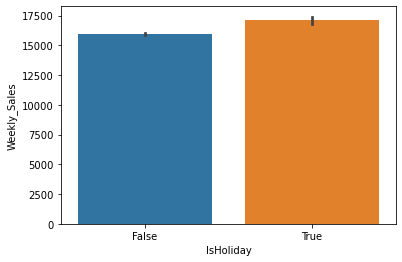

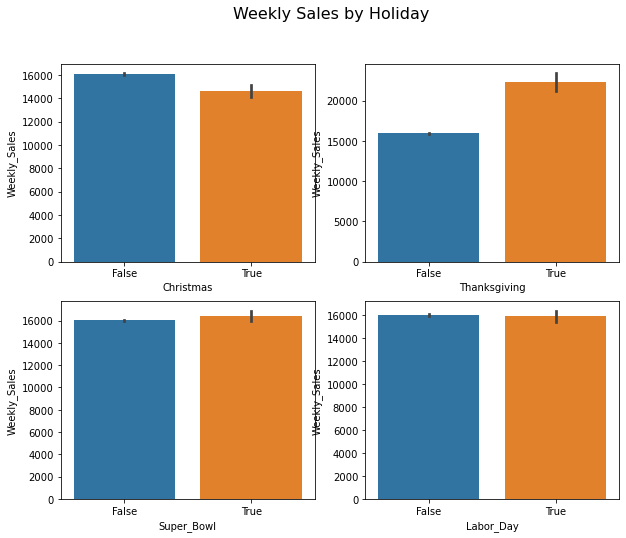

In [16]:
#average weekly sales holiday vs nonholiday
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(x='Christmas', y='Weekly_Sales', data=df, ax=axs[0, 0])
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df, ax=axs[0, 1])
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df, ax=axs[1, 0])
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df, ax=axs[1, 1])
fig.suptitle('Weekly Sales by Holiday', fontsize=16)
plt.show()

[18310.167534699223, 20004.26742233973, 27397.776345711456, 20612.757673550004]
[11488.988056768545, 12084.304641598117, 18733.973970588228, 12467.035505813987]
[8031.520607082627, 9893.459257592809, 9696.566615905238, 10179.271884222484]


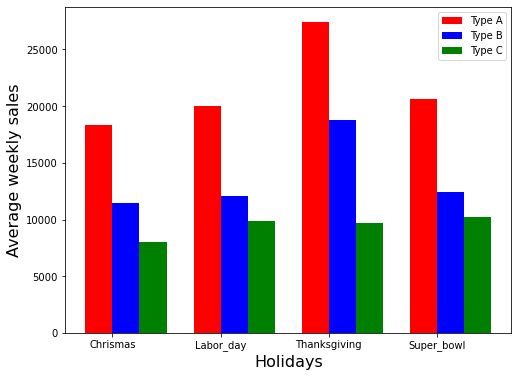

In [17]:
dfC = df.groupby(['Christmas','Type'])['Weekly_Sales'].mean().reset_index()# Avg weekly sales for types on Christmas 
#display(dfC)
dfL = df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean().reset_index()  # Avg weekly sales for types on Labor Day
#display(dfL)
dfT = df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean().reset_index() # Avg weekly sales for types on Thanksgiving
#display(df3)
dfS = df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean().reset_index()  # Avg weekly sales for types on Super Bowl
#display(dfS)
#df5 = df.groupby(['Super_Bowl','Thanksgiving','Christmas','Labor_Day','Type'])['Weekly_Sales'].mean().reset_index() 
#df5.drop_duplicates()
df5 = pd.concat([dfC, dfL, dfT, dfS], axis=1)
#display(df5)
Amean=list(df5.iloc[3].values[2::3])
print(Amean)
Bmean=list(df5.iloc[4].values[2::3])
print(Bmean)
Cmean=list(df5.iloc[5].values[2::3])
print(Cmean)
plt.figure(figsize=(8,6)) 
# Plotting average weekly sales according to holidays by types (3 types, 4 holidays,)
x_pos = np.arange(4) # x-coordinates of the bars
label=["Chrismas","Labor_day","Thanksgiving","Super_bowl"]
plt.bar(x_pos-0.25, Amean, width = 0.25, align = 'edge', label = 'Type A', color = 'r')
# a numpy array x_pos containing the indices of the rows in the DataFrame df.
plt.bar(x_pos, Bmean, width = 0.25, align = 'edge', label = 'Type B', color = 'b')
plt.bar(x_pos+0.25, Cmean, width = 0.25, align = 'edge', label = 'Type C', color = 'g')
plt.xticks(x_pos,label)
plt.ylabel('Average weekly sales',fontsize=16)
plt.xlabel('Holidays',fontsize =16)
plt.legend();
plt.show() 

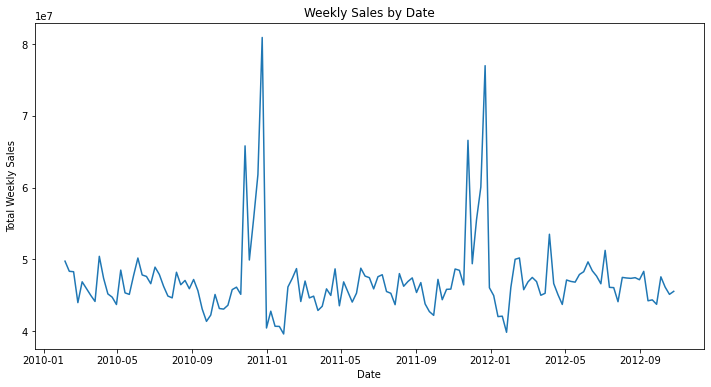

In [18]:
#weekly sales by date
df5 = df.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df5['Date'], df5['Weekly_Sales'])
ax.set_xlabel('Date')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Weekly Sales by Date')
plt.show()

Date  Weekly_Sales
0   2010-02-05   49750875.98
1   2010-02-12   48336800.10
2   2010-02-19   48277902.33
3   2010-02-26   43970440.65
4   2010-03-05   46872715.16
..         ...           ...
138 2012-09-28   43735713.56
139 2012-10-05   47567053.49
140 2012-10-12   46128909.98
141 2012-10-19   45122443.96
142 2012-10-26   45544379.53

[143 rows x 2 columns]

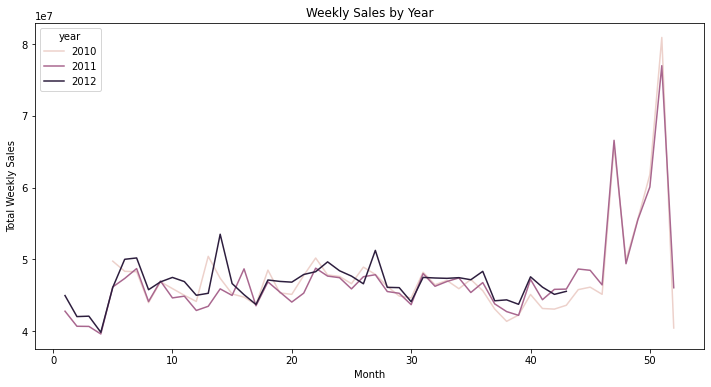

In [19]:
# weekly sale by year
df6 = df.groupby(['year','week'])['Weekly_Sales'].sum().reset_index()
display(df5)
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='week', y='Weekly_Sales', hue='year', data=df6)

# Set the title and axis labels
plt.title('Weekly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')

# Display the plot
plt.show()



The week-over-week overview once again provides insights into whether there is an increase in sales during holiday weeks, such as Thanksgiving, Christmas, Labor Day, and others. Notably, there is a clear spike in sales during weeks 47 and 51, which correspond to Thanksgiving and Christmas, respectively. This pattern reaffirms the observation that sales tend to rise during the holiday season. It is important to note that these conclusions have been drawn based on the available data from 2010 and 2011, as there is insufficient data for the year 2012.

Date Type  Weekly_Sales
0   2010-02-05    A   32144231.25
1   2010-02-05    B   14775516.11
2   2010-02-05    C    2831128.62
3   2010-02-12    A   30982620.79
4   2010-02-12    B   14439248.06
..         ...  ...           ...
424 2012-10-19    B   13363437.64
425 2012-10-19    C    2907405.83
426 2012-10-26    A   29128338.91
427 2012-10-26    B   13561158.14
428 2012-10-26    C    2854882.48

[429 rows x 3 columns]

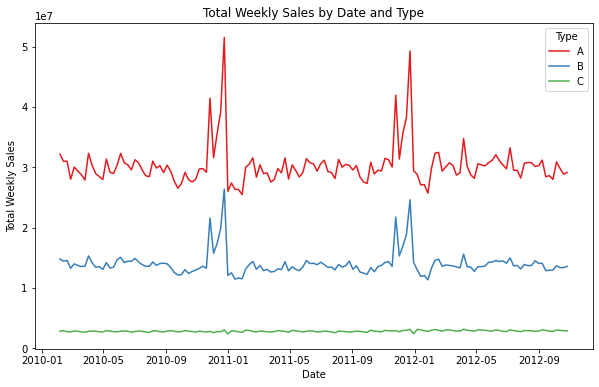

In [20]:
#weekly sale by type
df_plot = df.groupby(['Date', 'Type'])['Weekly_Sales'].sum().reset_index()
display(df_plot)
# create the plot using seaborn
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Type', data=df_plot, ax=ax, palette='Set1')

# set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Total Weekly Sales by Date and Type')
# show the plot
plt.show()

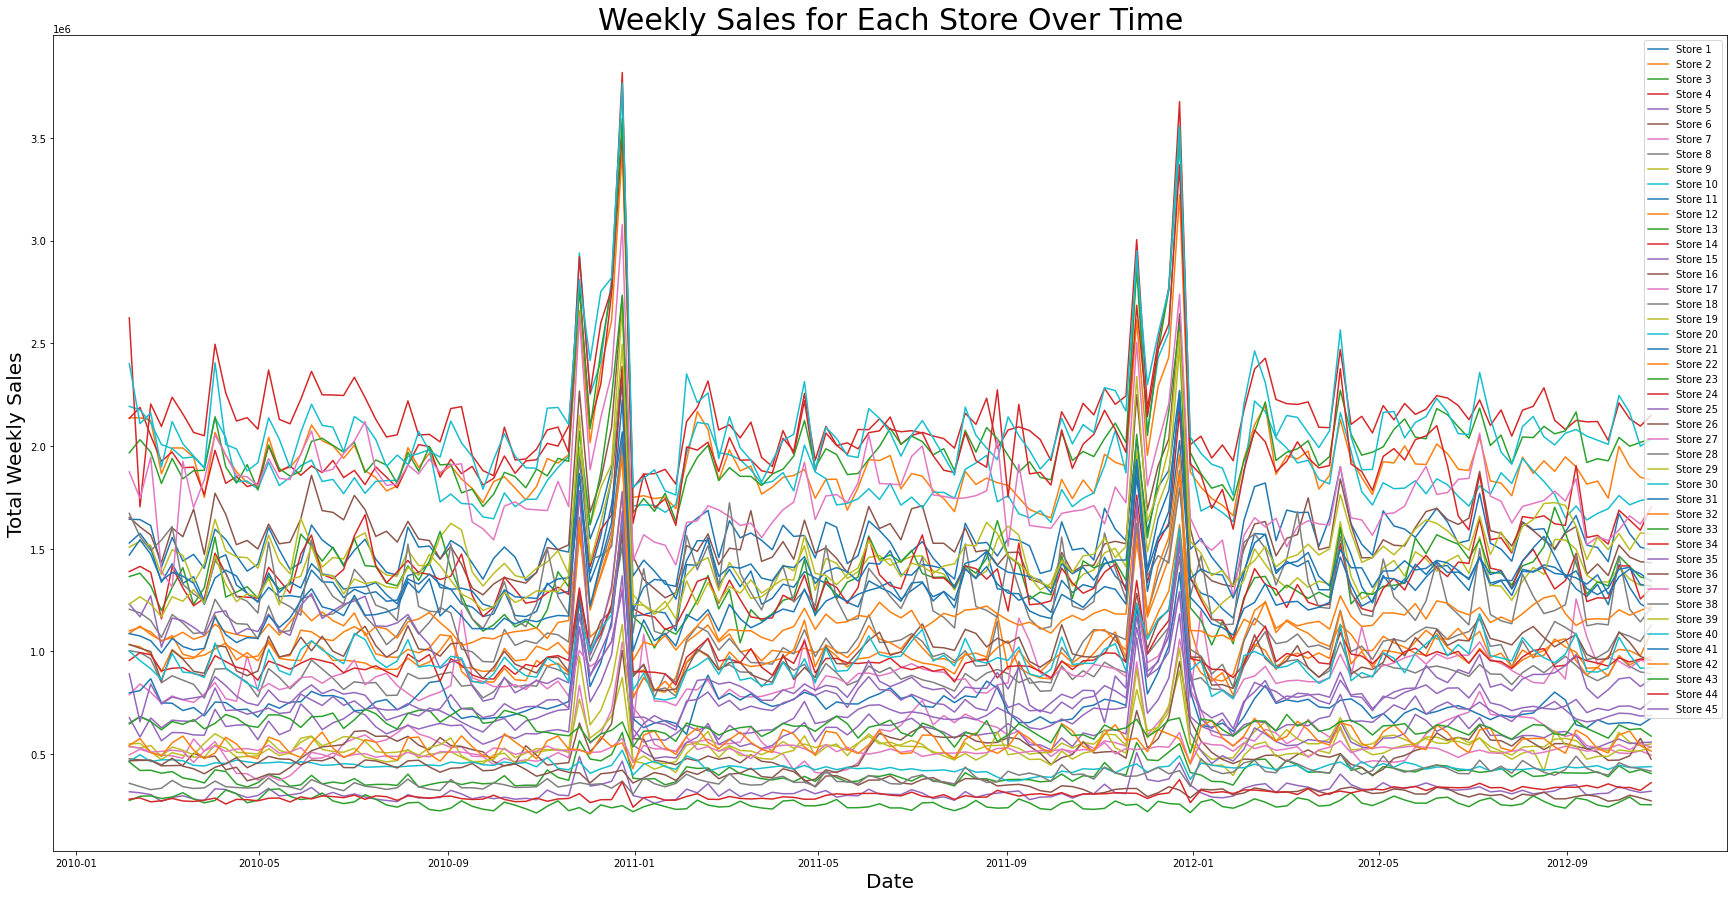

In [21]:
##overall weekly sales of each store
df4 = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

# Pivot the data to create a matrix of dates and sales for each store
df4_pivot = df4.pivot(index='Date', columns='Store', values='Weekly_Sales')

# Create the plot using seaborn
fig, ax = plt.subplots(figsize=(30, 15))
for store in df4_pivot.columns:
    ax.plot(df4_pivot.index, df4_pivot[store], label='Store {}'.format(store))

# Set the axis labels and title
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Total Weekly Sales', fontsize=20)
ax.set_title('Weekly Sales for Each Store Over Time', fontsize=30)

# Set the legend
ax.legend()

# Show the plot
plt.show()

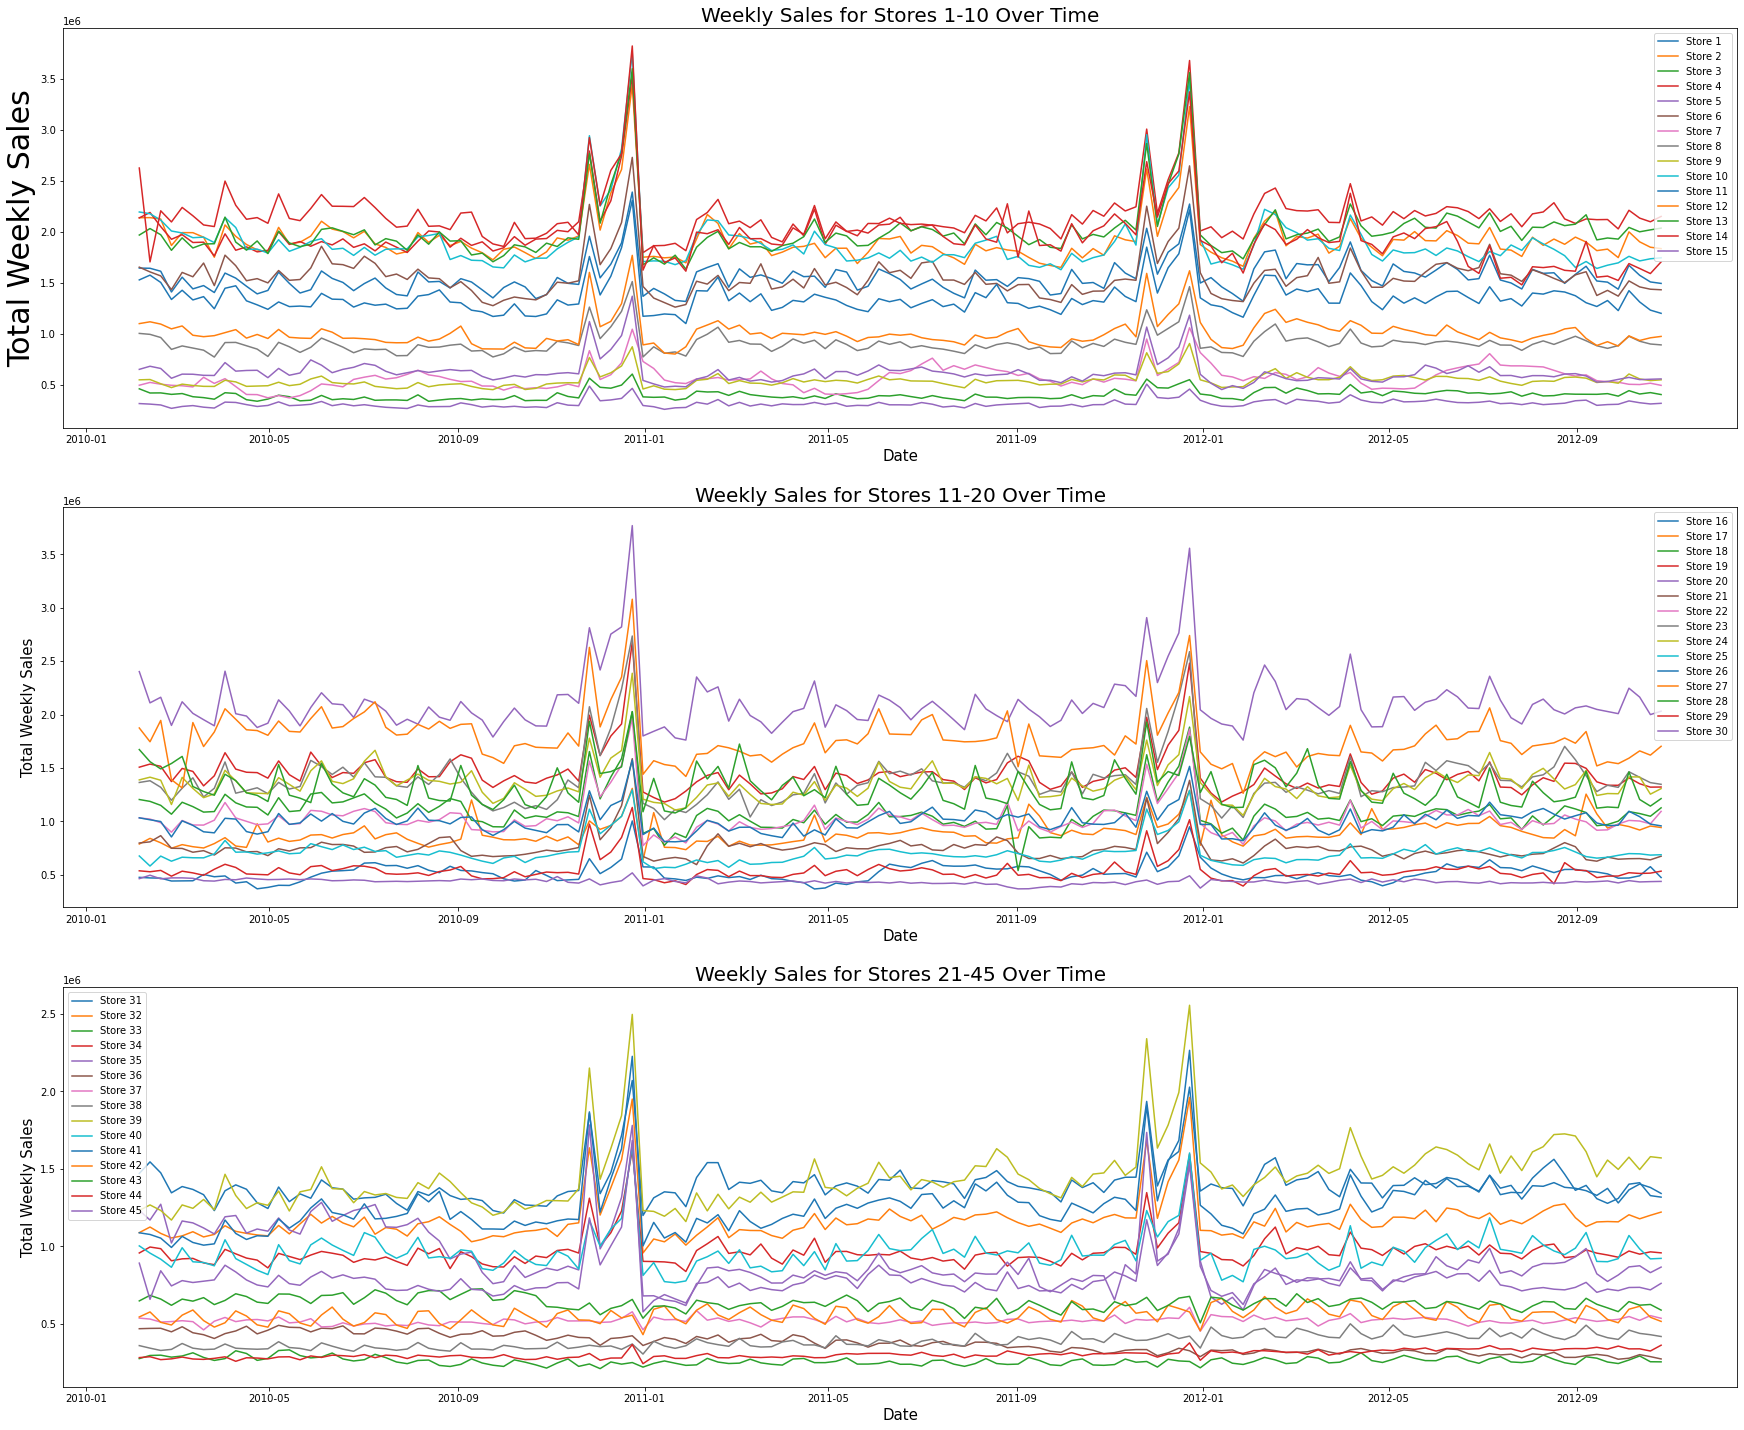

In [22]:
df4 = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

# Pivot the data to create a matrix of dates and sales for each store
df4_pivot = df4.pivot(index='Date', columns='Store', values='Weekly_Sales')

# Create three subplots using plt.subplots()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, figsize=(30, 25))

# Plot the first 10 stores on the first subplot
for store in df4_pivot.columns[:15]:
    ax1.plot(df4_pivot.index, df4_pivot[store], label='Store {}'.format(store))
ax1.set_title('Weekly Sales for Stores 1-10 Over Time', fontsize=20)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Weekly Sales', fontsize=30)
ax1.legend()

# Plot the next 10 stores on the second subplot
for store in df4_pivot.columns[15:30]:
    ax2.plot(df4_pivot.index, df4_pivot[store], label='Store {}'.format(store))
ax2.set_title('Weekly Sales for Stores 11-20 Over Time', fontsize=20)
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Total Weekly Sales', fontsize=15)
ax2.legend()

# Plot the remaining stores on the third subplot
for store in df4_pivot.columns[30:]:
    ax3.plot(df4_pivot.index, df4_pivot[store], label='Store {}'.format(store))
ax3.set_title('Weekly Sales for Stores 21-45 Over Time', fontsize=20)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Total Weekly Sales', fontsize=15)
ax3.legend()

# Show the plot
plt.show()

The plot depicting the weekly sales for each store over time reveals a noticeable increase in sales between the periods of 2010-11 and 2020-12, as well as between 2011-11 and 2011-12. These time frames align with the Thanksgiving and Christmas seasons, respectively, for most stores. However, for certain stores like 30, 34, 36, 37, and 38, there are no evident fluctuations in sales during the holiday season.

For the top ten stores ranked by sales, there is a distinct and prominent surge in sales during weeks 47 and 51, which correspond specifically to Thanksgiving and Christmas, respectively. These weeks showcase a clear pattern of increased sales during the holiday season for these top-performing stores.

Store  Weekly_Sales
0       1  2.224068e+08
1       2  2.753872e+08
2       3  5.758793e+07
3       4  2.995453e+08
4       5  4.547612e+07
5       6  2.237586e+08
6       7  8.159950e+07
7       8  1.299515e+08
8       9  7.779117e+07
9      10  2.716241e+08
10     11  1.939644e+08
11     12  1.442911e+08
12     13  2.865180e+08
13     14  2.890019e+08
14     15  8.913487e+07
15     16  7.425674e+07
16     17  1.277832e+08
17     18  1.551158e+08
18     19  2.066377e+08
19     20  3.014014e+08
20     21  1.081196e+08
21     22  1.470768e+08
22     23  1.987527e+08
23     24  1.940166e+08
24     25  1.010618e+08
25     26  1.434166e+08
26     27  2.538572e+08
27     28  1.892715e+08
28     29  7.714283e+07
29     30  6.271701e+07
30     31  1.996149e+08
31     32  1.668208e+08
32     33  3.716033e+07
33     34  1.382526e+08
34     35  1.315300e+08
35     36  5.341335e+07
36     37  7.420286e+07
37     38  5.515990e+07
38     39  2.074465e+08
39     40  1.378716e+08
40     41  1.813429e+08
41     42  7.956804e+07
42     43  9.056653e+07
43     44  4.329367e+07
44     45  1.123973e+08

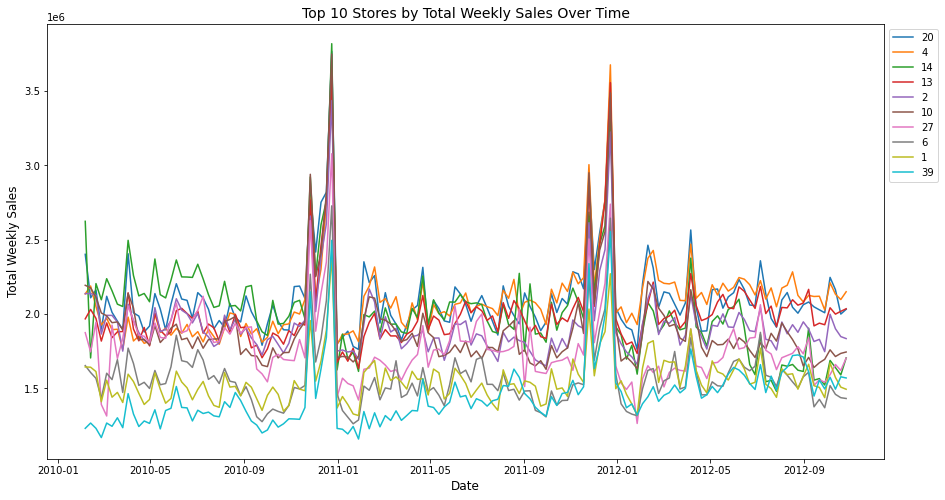

In [23]:
# Get the top 10 stores by total weekly sales
df_top_stores = df.groupby(['Store'])['Weekly_Sales'].sum().reset_index()
display(df_top_stores)
df_top_stores = df_top_stores.sort_values(by='Weekly_Sales', ascending=False).head(10)
top_stores = list(df_top_stores['Store'])#find the top 10 sales store
# Filter the data for the top 10 stores only
df_top_sales = df4[df4['Store'].isin(top_stores)]
# Group the data by date and store
df_sales_by_date_store = df_top_sales.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()
# Pivot the data to create a matrix of dates and sales for each store
df_sales_by_date_store_pivot = df_sales_by_date_store.pivot(index='Date', columns='Store', values='Weekly_Sales')
# Select the top 10 stores based on the sum of sales over the entire period
top_stores_total = df_top_stores.sort_values(by='Weekly_Sales', ascending=False).head(10)['Store'].values.tolist()
# Create the line plot using matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
for store in top_stores_total:
    ax.plot(df_sales_by_date_store_pivot[store], label=store)
# Set the axis labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Weekly Sales', fontsize=12)
ax.set_title('Top 10 Stores by Total Weekly Sales Over Time', fontsize=14)

# Add legend and show the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

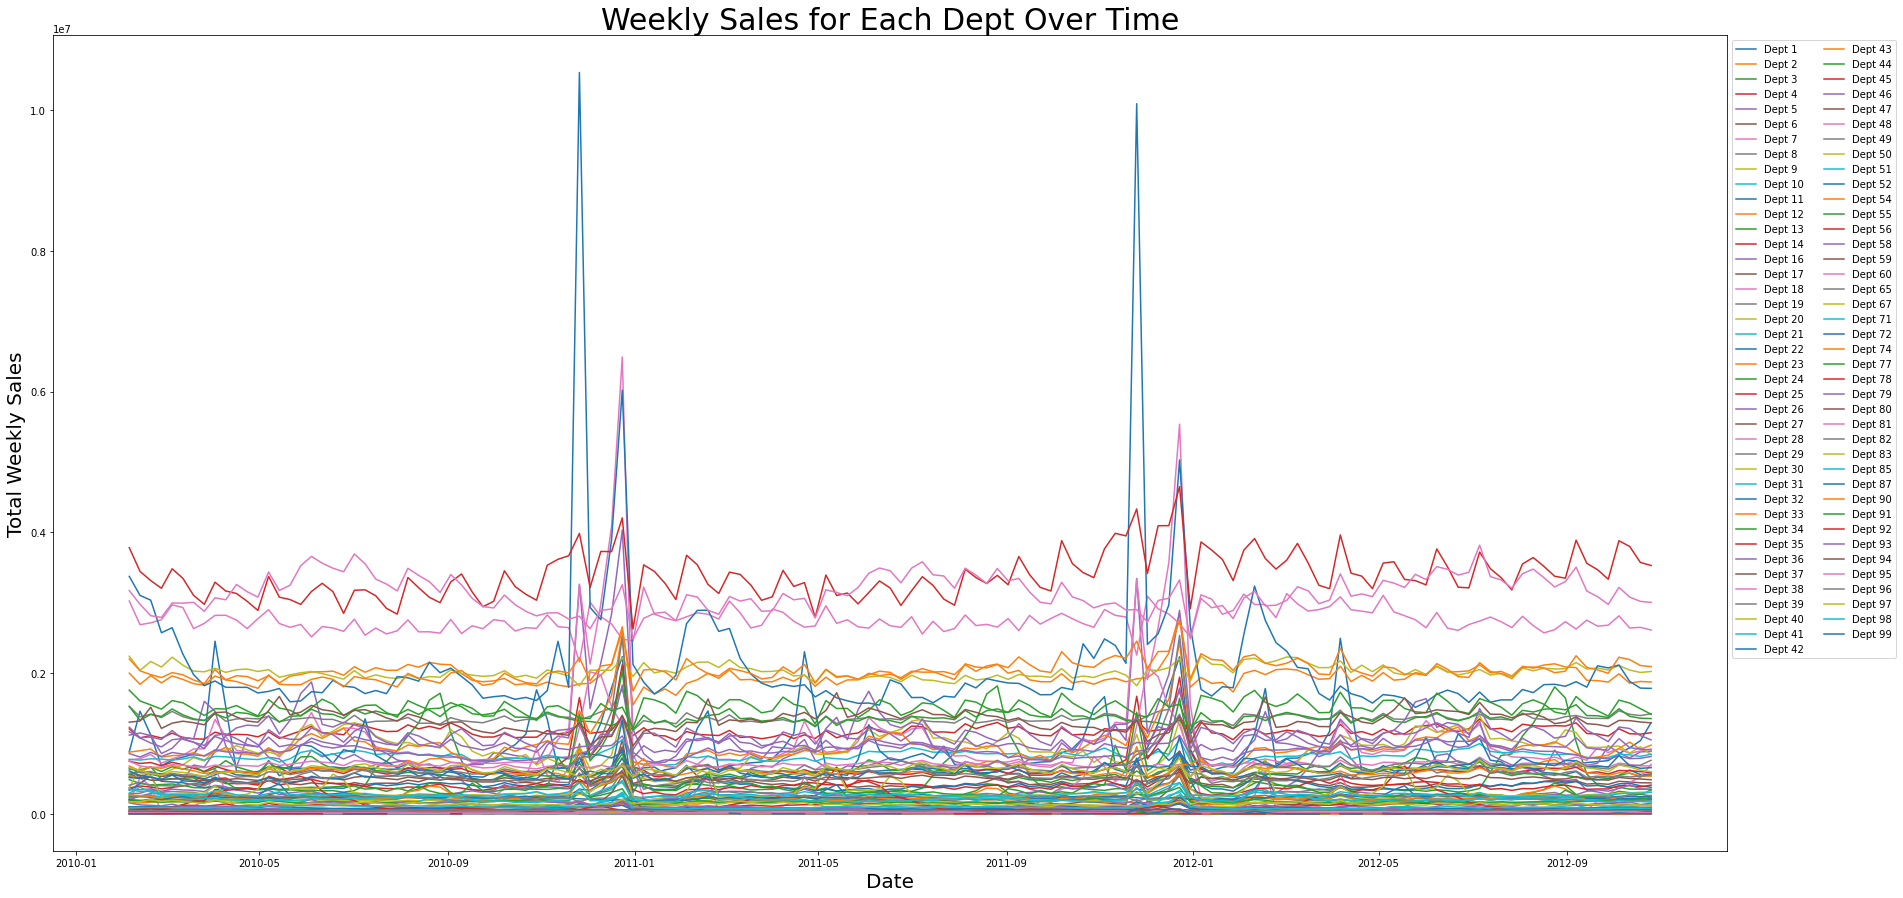

In [24]:
##overall weekly sales of each store
df6 = df.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Pivot the data to create a matrix of dates and sales for each store
df6_pivot = df6.pivot(index='Date', columns='Dept', values='Weekly_Sales')
# Create the plot using seaborn
fig, ax = plt.subplots(figsize=(30, 15))
for dept in df6_pivot.columns:
    ax.plot(df6_pivot.index, df6_pivot[dept], label='Dept {}'.format(dept))

# Set the axis labels and title
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Total Weekly Sales', fontsize=20)
ax.set_title('Weekly Sales for Each Dept Over Time', fontsize=30)

# Set the legend
ax.legend(bbox_to_anchor=(1, 1),ncol =2)
# Show the plot
plt.show()

Dept  Weekly_Sales
0      1  1.236388e+08
1      2  2.806112e+08
2      3  7.589245e+07
3      4  1.671467e+08
4      5  1.356074e+08
..   ...           ...
76    95  4.493202e+08
77    96  7.383421e+07
78    97  8.949653e+07
79    98  3.982907e+07
80    99  3.584093e+05

[81 rows x 2 columns]

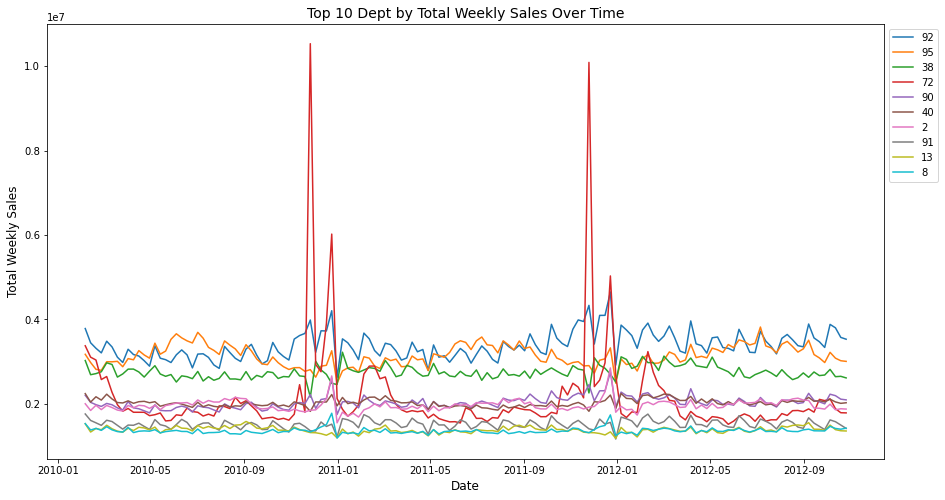

In [25]:
# Get the top 10 depts by total weekly sales
df_top_stores = df.groupby(['Dept'])['Weekly_Sales'].sum().reset_index()
display(df_top_stores)
df_top_stores = df_top_stores.sort_values(by='Weekly_Sales', ascending=False).head(10)
top_stores = list(df_top_stores['Dept'])
# Filter the data for the top 10 stores only
df_top_sales = df6[df6['Dept'].isin(top_stores)]
# Group the data by date and store
df_sales_by_date_store = df_top_sales.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()
# Pivot the data to create a matrix of dates and sales for each store
df_sales_by_date_store_pivot = df_sales_by_date_store.pivot(index='Date', columns='Dept', values='Weekly_Sales')
# Select the top 10 stores based on the sum of sales over the entire period
top_stores_total = df_top_stores.sort_values(by='Weekly_Sales', ascending=False).head(10)['Dept'].values.tolist()
# Create the line plot using matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
for dept in top_stores_total:
    ax.plot(df_sales_by_date_store_pivot[dept], label=dept)
# Set the axis labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Weekly Sales', fontsize=12)
ax.set_title('Top 10 Dept by Total Weekly Sales Over Time', fontsize=14)

# Add legend and show the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The plot illustrating the weekly sales for each department over time reveals a discernible increase in sales between the periods of 2010-11 and 2020-12, as well as between 2011-11 and 2011-12. These time frames align with the Thanksgiving and Christmas seasons, respectively, for most departments. However, for certain departments, there are no apparent fluctuations in sales during the holiday season.

Among the top ten departments ranked by sales, it is notable that Department 72 exhibits the most conspicuous increase in sales during weeks 47 and 51, which correspond to the Thanksgiving and Christmas periods, respectively. In contrast, for Department 13, the variation in sales is not as evident during the holiday season.

Overall, while many departments experience a clear surge in sales during Thanksgiving and Christmas, there are variations in the sales patterns across different departments, with Department 72 displaying the most noticeable increase during the holiday season. Conversely, Department 13 does not exhibit significant sales variation during this period.

**Size vs Sales**

40


Size Type  Weekly_Sales
0    34875    B   5065.283995
1    37392    B   6380.226664
2    39690    A   5736.388608
3    39690    C   9449.287725
4    39910    A   8619.227546
5    39910    C   8193.621485
6    41062    C  13463.138546
7    42988    C   8785.125694
8    57197    B   7897.132309
9    70713    B   8379.492279
10   93188    B  13023.154252
11   93638    B   8185.783800
12  103681    B  13989.575528
13  112238    B  14929.244341
14  114533    B  19839.563326
15  118221    B  11695.871003
16  119557    B  15247.436339
17  120653    B  15820.075220
18  123737    B   9045.551883
19  125833    B   8805.882422
20  126512    B  26474.084736
21  128107    B  10346.216563
22  140167    B  11328.537256
23  151315    A  21749.145978
24  152513    A  14568.937406
25  155078    A  13148.994199
26  155083    A  13783.028706
27  158114    A  13546.210778
28  184109    A  21084.103489
29  196321    A  18031.506002
30  200898    A  28885.743572
31  202307    A  26961.734433
32  202505    A  21960.799719
33  203007    A  16403.222829
34  203742    A  29627.580994
35  203750    A  19761.897868
36  203819    A  19713.357824
37  204184    A  24897.723614
38  205863    A  29175.540012
39  206302    A  18741.608875
40  207499    A  19332.641482
41  219622    A  27399.631860

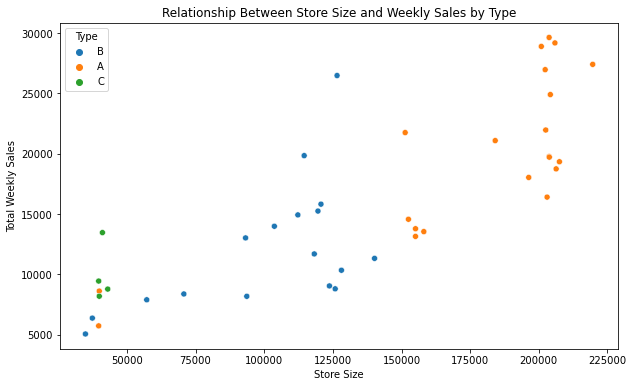

In [26]:
print(df.Size.nunique())
df8 = df.groupby(['Size', 'Type'])['Weekly_Sales'].mean().reset_index()
display(df8)

# Create the scatter plot using seaborn
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=df8, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Store Size')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Relationship Between Store Size and Weekly Sales by Type')

# Show the plot
plt.show()

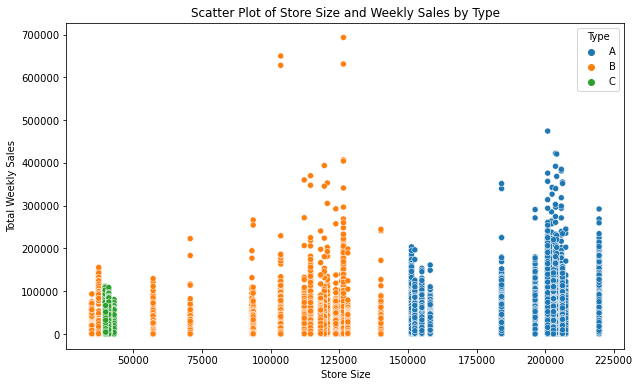

In [27]:
df8 = df[['Size', 'Type','Weekly_Sales']]
#display(df8)

# Create the scatter plot using seaborn
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=df8, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Store Size')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Scatter Plot of Store Size and Weekly Sales by Type')

# Show the plot
plt.show()


Based on the previous visualization, it is established that Type 'A' stores are the largest, followed by Type 'B' and 'C' stores. The graph below illustrates a linear relationship between the store size and their corresponding sales, with a few exceptions. Interestingly, some Type 'B' stores, as depicted below, achieve higher average sales than Type 'A' stores, contrary to the general notion that larger store size leads to higher sales. However, overall, Type 'A' stores still demonstrate a significant level of sales, while Type 'C' stores exhibit notably lower sales.

In summary, there is a general trend of increasing sales with an increase in the size of the store, with only minor exceptions observed. Although some Type 'B' stores defy the conventional relationship, Type 'A' stores remain dominant in terms of sales, while Type 'C' stores consistently generate relatively smaller sales.

**Temperature vs Sales**

3528


Temperature Type  Weekly_Sales
0           -2.06    B   8329.033881
1            5.54    A  12021.840294
2            6.23    B  15927.781029
3            7.46    B   8606.890725
4            9.51    A  11084.434714
...           ...  ...           ...
5214        99.22    B  13824.298030
5215        99.22    C   6566.737000
5216        99.66    A   4939.496250
5217       100.07    A   6472.901957
5218       100.14    A   6384.950909

[5219 rows x 3 columns]

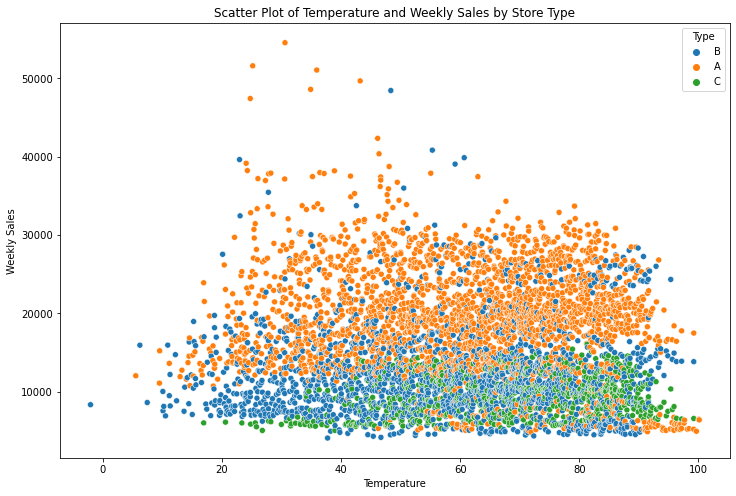

In [28]:
print(df.Temperature.nunique())
df_temp = df.groupby(['Temperature', 'Type'])['Weekly_Sales'].mean().reset_index()
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
# Set the axis labels and title
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Type', data=df_temp)
ax.set_xlabel('Temperature')
ax.set_ylabel('Weekly Sales')
ax.set_title('Scatter Plot of Temperature and Weekly Sales by Store Type')
plt.show()

3528


Temperature Type  Weekly_Sales
0             42.31    A      24924.50
1             42.31    A      50605.27
2             42.31    A      13740.12
3             42.31    A      39954.04
4             42.31    A      32229.38
...             ...  ...           ...
421565        58.85    B       2487.80
421566        58.85    B       5203.31
421567        58.85    B      56017.47
421568        58.85    B       6817.48
421569        58.85    B       1076.80

[420212 rows x 3 columns]

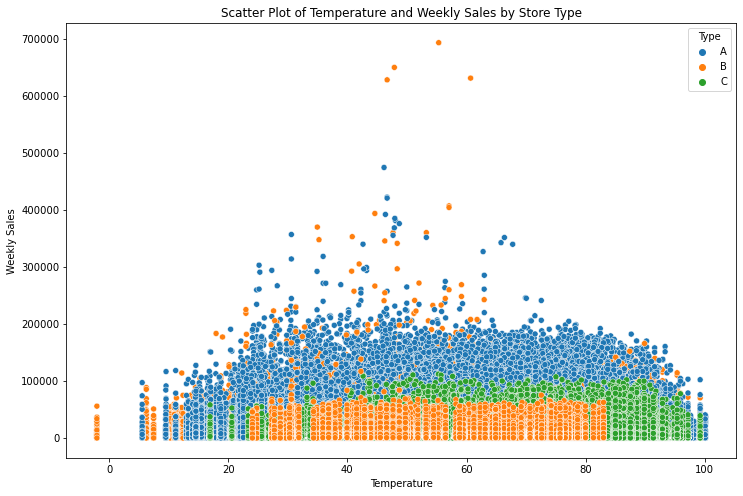

In [29]:
print(df.Temperature.nunique())
df_temp = df[['Temperature', 'Type','Weekly_Sales']]
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
# Set the axis labels and title
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Type', data=df_temp)
ax.set_xlabel('Temperature')
ax.set_ylabel('Weekly Sales')
ax.set_title('Scatter Plot of Temperature and Weekly Sales by Store Type')
plt.show()

It is widely recognized in the retail sector that weather significantly influences sales. Warmer weather generally stimulates sales, while cold/harsh or extremely hot weather tends to discourage shoppers from venturing outdoors and spending money. Typically, temperatures ranging from 40 to 70 degrees Fahrenheit are considered favorable for human comfort, as they are neither excessively hot nor cold.

As depicted below, the highest sales occur within the temperature range of 40 to 80 degrees Fahrenheit for most store types. This observation reinforces the notion that pleasant weather conditions serve as a catalyst for increased sales. Sales tend to be relatively lower during very low and very high temperatures, but they remain adequately high during favorable climate conditions.

In summary, the data confirms that sales are most robust within the temperature range of 40 to 80 degrees Fahrenheit, aligning with the idea that favorable weather conditions encourage higher sales. Conversely, sales tend to be lower during extreme temperature conditions, underscoring the importance of weather on consumer behavior and purchasing decisions.

**Unemployment vs Sales**

349


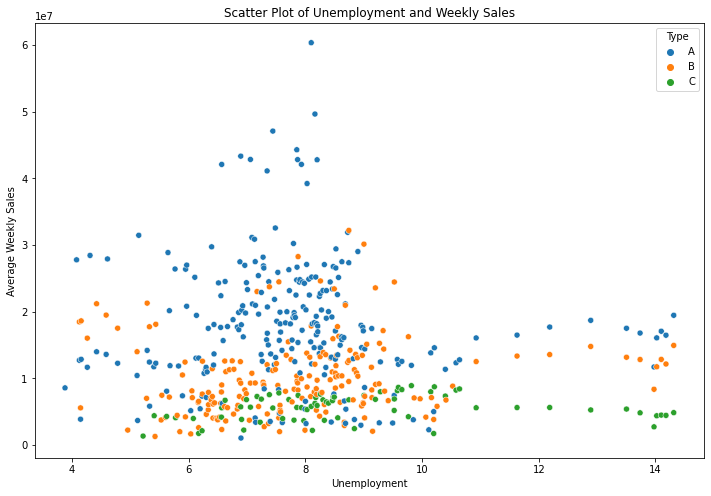

In [30]:
print(df.Unemployment.nunique())
df6 = df.groupby(['Unemployment',"Type"])['Weekly_Sales'].sum().reset_index()
display(df=6)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Unemployment', y='Weekly_Sales',hue="Type", data=df6)

# Set the axis labels and title
plt.xlabel('Unemployment')
plt.ylabel('Average Weekly Sales')
plt.title('Scatter Plot of Unemployment and Weekly Sales')

# Show the plot
plt.show()

3528


Unemployment Type  Weekly_Sales
0              8.106    A      24924.50
1              8.106    A      50605.27
2              8.106    A      13740.12
3              8.106    A      39954.04
4              8.106    A      32229.38
...              ...  ...           ...
421565         8.667    B       2487.80
421566         8.667    B       5203.31
421567         8.667    B      56017.47
421568         8.667    B       6817.48
421569         8.667    B       1076.80

[420212 rows x 3 columns]

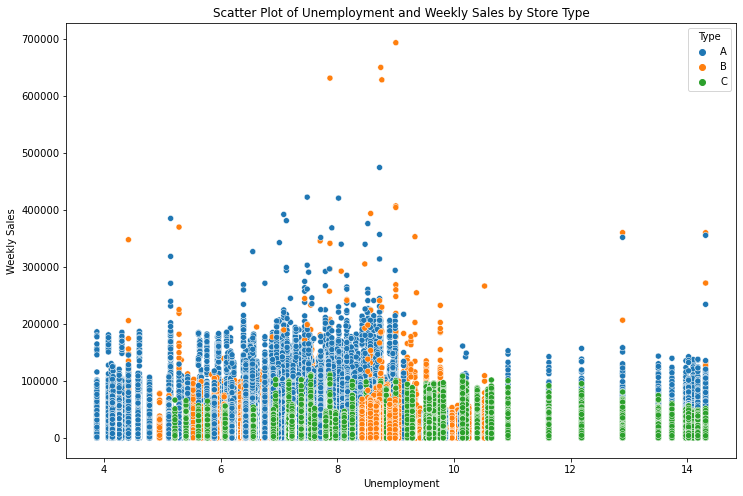

In [31]:
print(df.Temperature.nunique())
df_temp = df[['Unemployment', 'Type','Weekly_Sales']]
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
# Set the axis labels and title
sns.scatterplot(x='Unemployment', y='Weekly_Sales', hue='Type', data=df_temp)
ax.set_xlabel('Unemployment')
ax.set_ylabel('Weekly Sales')
ax.set_title('Scatter Plot of Unemployment and Weekly Sales by Store Type')
plt.show()

It is well established that spending experiences a sharp decline during periods of unemployment, as individuals tend to reduce their overall expenditures. In our dataset, unemployment is represented by an index reflecting the unemployment rate in the store's region for a given week. By examining the scatter plot, we can gather the following insights:

• Across the given store types, there is a noticeable decrease in sales when the unemployment index surpasses 11.

• Even when the unemployment index exceeds 11, Type C stores do not exhibit a significant change in average sales compared to the overall sales pattern.

• There is a significant drop in sales for Type A and B stores as the unemployment index increases.

• The highest recorded sales for Type A and B stores are observed around the unemployment index range of 8 to 10. This presents ambiguous findings regarding the impact of unemployment on sales for each store type.

In summary, the scatter plot indicates that higher levels of unemployment, particularly when the unemployment index exceeds 11, lead to a decrease in sales for Type A and B stores. However, Type C stores show relatively stable sales despite changes in the unemployment index. The relationship between unemployment and sales remains complex and may vary among different store types.


**CPI Effect**

2145


CPI Type  Weekly_Sales
0     126.064000    A  19268.010823
1     126.064000    B  17986.484138
2     126.064000    C   8325.433425
3     126.076645    A  19353.923716
4     126.076645    B  18393.899010
...          ...  ...           ...
3713  227.018417    A  13047.967391
3714  227.036936    A  12738.163429
3715  227.169392    B   8864.520635
3716  227.214288    B   8742.088065
3717  227.232807    B   8725.896667

[3718 rows x 3 columns]

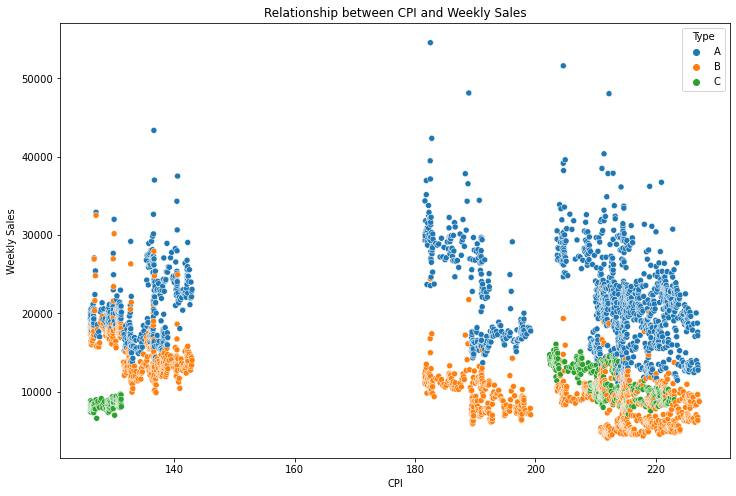

In [32]:
print(df.CPI.nunique())
df_temp = df.groupby(['CPI',"Type"])['Weekly_Sales'].mean().reset_index()
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='CPI', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Relationship between CPI and Weekly Sales')

# Show the plot
plt.show()

2145


CPI Type  Weekly_Sales
0       211.096358    A      24924.50
1       211.096358    A      50605.27
2       211.096358    A      13740.12
3       211.096358    A      39954.04
4       211.096358    A      32229.38
...            ...  ...           ...
421565  192.308899    B       2487.80
421566  192.308899    B       5203.31
421567  192.308899    B      56017.47
421568  192.308899    B       6817.48
421569  192.308899    B       1076.80

[420212 rows x 3 columns]

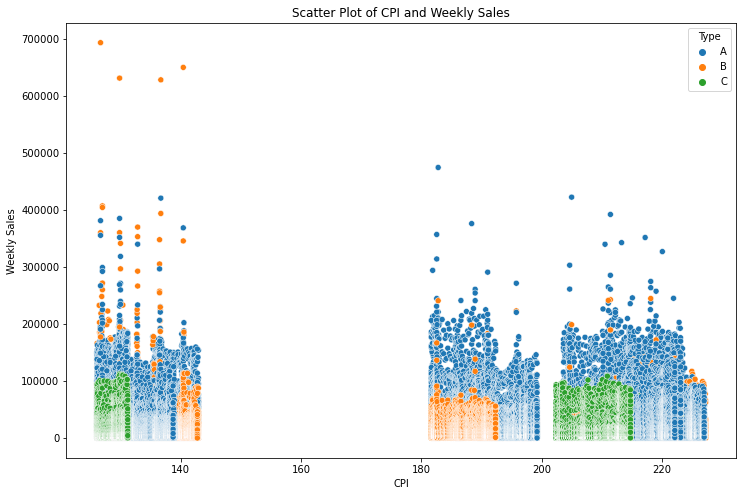

In [33]:
print(df.CPI.nunique())
df_temp = df[['CPI',"Type",'Weekly_Sales']]
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='CPI', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of CPI and Weekly Sales')

# Show the plot
plt.show()

According to the US Bureau of Labor Statistics, the Consumer Price Index (CPI) is a measure that tracks the average change over time in the prices paid by urban consumers for a market basket of goods and services. In simpler terms, CPI assesses the price fluctuations associated with the cost of living for individuals. It serves as a valuable tool for studying inflation, which refers to the increase in prices of goods and services consumed by the general population. CPI is commonly used by the government to evaluate and adjust assistance programs based on income levels and to provide wage adjustments to account for changing cost of living expenses. A higher CPI indicates that the price of goods has risen, requiring individuals to spend more money to maintain their standard of living.

In our scatter plot, we observe three distinct clusters associated with different ranges of CPI. While no clear relationship can be discerned between the change in CPI and weekly sales for Walmart stores (sales still occur at high CPI rates), we do note a minor observation. Specifically, there appears to be a relatively high level of sales for Type B stores when the CPI is at a low rate of 140.

To summarize, the scatter plot suggests that CPI rates do not significantly impact weekly sales for Walmart stores, as sales remain consistent even at higher CPI levels. However, we do observe a potential association between Type B stores and increased sales when CPI is relatively low at 140

**Fuel Price**

892


Fuel_Price Type  Weekly_Sales
0            2.572    A      24924.50
1            2.572    A      50605.27
2            2.572    A      13740.12
3            2.572    A      39954.04
4            2.572    A      32229.38
...            ...  ...           ...
421565       3.882    B       2487.80
421566       3.882    B       5203.31
421567       3.882    B      56017.47
421568       3.882    B       6817.48
421569       3.882    B       1076.80

[420212 rows x 3 columns]

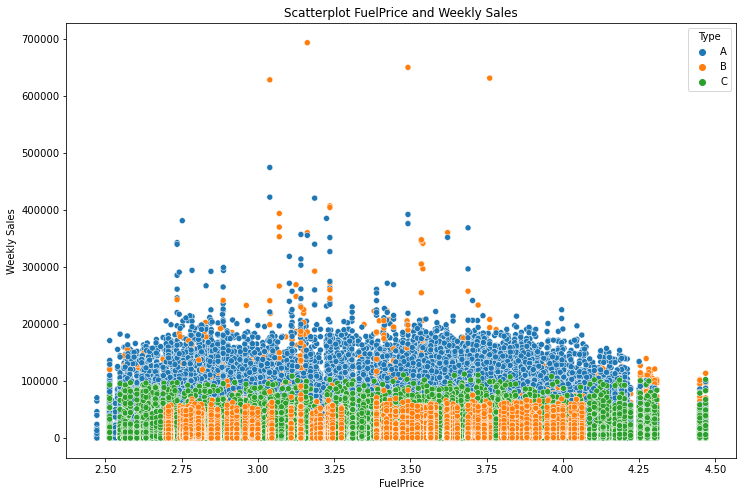

In [34]:
print(df.Fuel_Price.nunique())
df_temp = df[['Fuel_Price',"Type",'Weekly_Sales']]
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('FuelPrice')
plt.ylabel('Weekly Sales')
plt.title('Scatterplot FuelPrice and Weekly Sales')

# Show the plot
plt.show()

The visualization below suggests a potential relationship between fuel prices and consumer buying behavior. We observe that when the fuel price exceeds $4.25, there appears to be a decrease in sales. On the other hand, sales tend to be higher when the fuel price ranges between $2.75 and $3.75. Notably, during this price range, some of the highest sales occurrences for store types A and B are observed.

Although the visualization does not provide a definitive pattern, these observations imply that lower fuel prices may encourage higher sales. When fuel prices are relatively lower, consumers may feel more inclined to actively purchase their required goods and services. The reasoning behind this could be that lower fuel prices reduce the overall cost burden on consumers, making it more affordable for them to engage in spending.

It is important to note that fuel prices are just one factor among many that influence consumer behavior and purchasing decisions. Other factors such as income, economic conditions, and individual preferences also play a significant role. Therefore, while lower fuel prices may have a positive impact on sales, it is necessary to consider the broader context and multiple factors affecting consumer behavior in order to draw definitive conclusions.

**Markdown effect by using only available data**

In [35]:
df['Date'].head(5).append(df['Date'].tail(5)) # to see first and last 5 rows.
print(sorted(set(list(df['Date'])))[0])
print(sorted(set(list(df['Date'])))[-1])
print(df['Date'].nunique())#Our data is from 5th of February 2010(2010-02-05) to 26th of October 2012.(2012-10-26)
#list(sorted(set(df.Date)))

2010-02-05 00:00:00
2012-10-26 00:00:00
143


MarkDown1  Weekly_Sales Type
6587     10382.90      18689.54    A
6588     10382.90      44936.47    A
6589     10382.90       9959.64    A
6590     10382.90      36826.52    A
6591     10382.90      31002.65    A
...           ...           ...  ...
421565    4018.91       2487.80    B
421566    4018.91       5203.31    B
421567    4018.91      56017.47    B
421568    4018.91       6817.48    B
421569    4018.91       1076.80    B

[150929 rows x 3 columns]

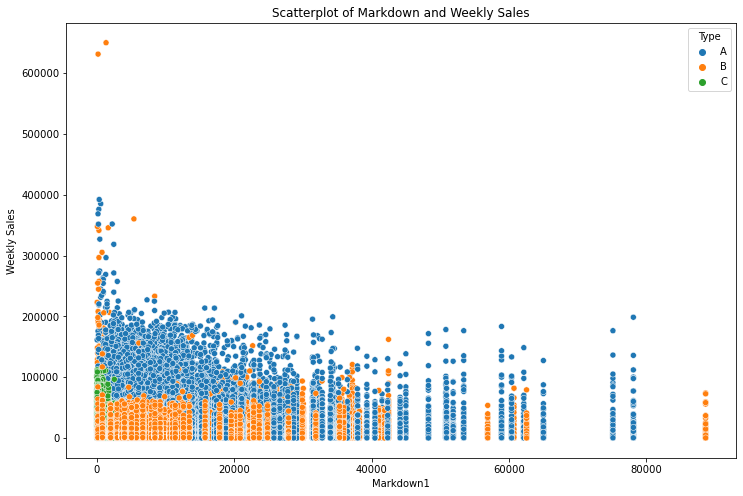

In [36]:
#dfmark = df.loc[df['Date']>='2011-11-04']
dfmark = df.loc[df['Date']>='2011-11-11']#markdown only available data from 2011-11-11
df_temp = dfmark[['MarkDown1','Weekly_Sales',"Type"]]
display(df_temp)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='MarkDown1', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('Markdown1')
plt.ylabel('Weekly Sales')
plt.title('Scatterplot of Markdown and Weekly Sales')

# Show the plot
plt.show()

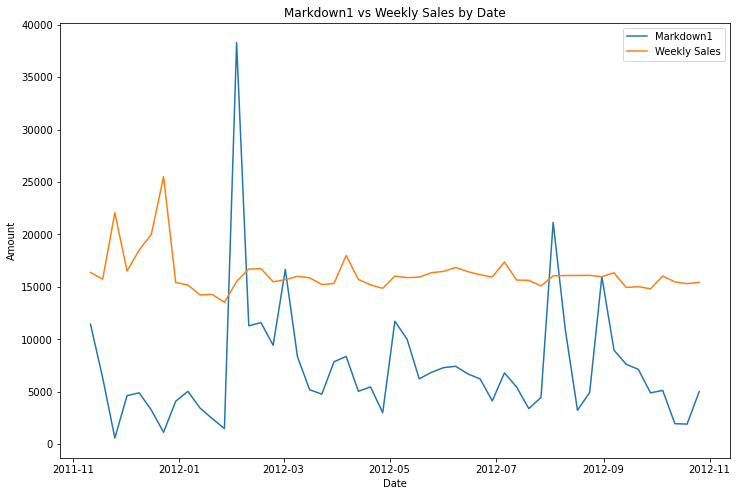

In [37]:
# Calculate the mean of Markdown1 and Weekly Sales for each date
df_temp1 = dfmark.groupby(["Date"])["MarkDown1"].mean()
df_temp2 = dfmark.groupby(["Date"])["Weekly_Sales"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the data
ax.plot(df_temp1.index, df_temp1.values, label="Markdown1")
ax.plot(df_temp2.index, df_temp2.values, label="Weekly Sales")

# Set the axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
ax.set_title("Markdown1 vs Weekly Sales by Date")

# Add a legend
ax.legend()

# Display the plot
plt.show()


           MarkDown2   Weekly_Sales
count  110904.000000  150929.000000
mean     3330.146158   16231.116041
std      9460.395025   23254.154194
min      -265.760000       0.010000
25%        41.600000    2038.740000
50%       192.000000    7585.620000
75%      1926.940000   20481.840000
max    104519.540000  649770.180000


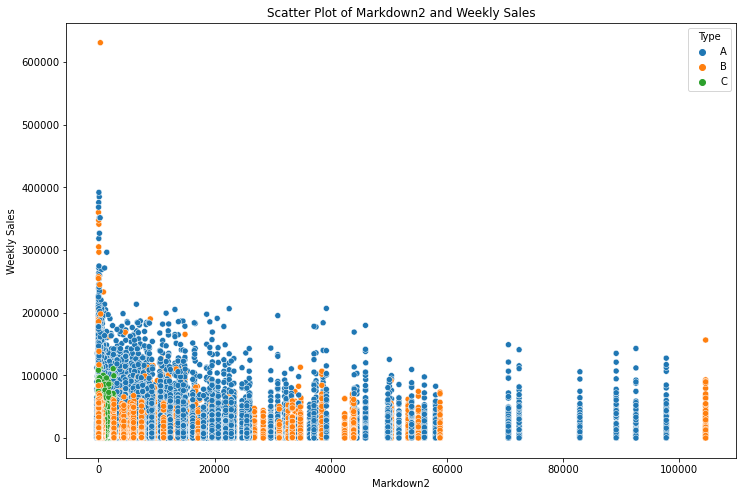

In [38]:
df_temp = dfmark[['MarkDown2','Weekly_Sales',"Type"]]
print(df_temp.describe())
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='MarkDown2', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('Markdown2')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Markdown2 and Weekly Sales')

# Show the plot
plt.show()

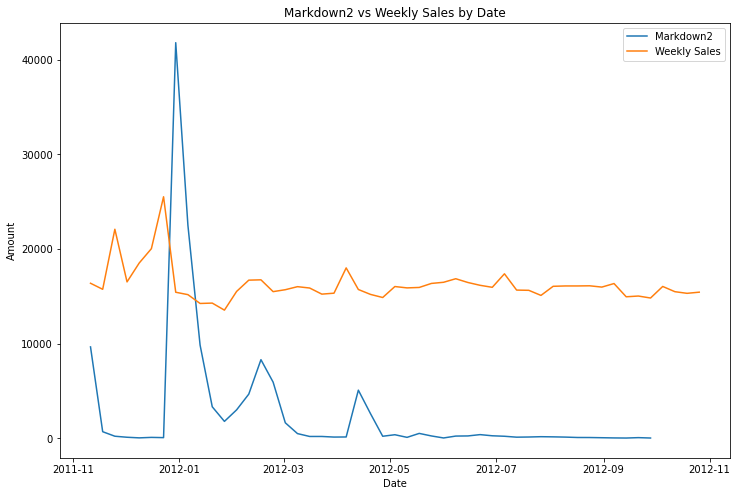

In [39]:
# Calculate the mean of Markdown1 and Weekly Sales for each date
df_temp1 = dfmark.groupby(["Date"])["MarkDown2"].mean()
df_temp2 = dfmark.groupby(["Date"])["Weekly_Sales"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the data
ax.plot(df_temp1.index, df_temp1.values, label="Markdown2")
ax.plot(df_temp2.index, df_temp2.values, label="Weekly Sales")

# Set the axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
ax.set_title("Markdown2 vs Weekly Sales by Date")

# Add a legend
ax.legend()

# Display the plot
plt.show()

           MarkDown3   Weekly_Sales
count  136651.000000  150929.000000
mean     1441.736203   16231.116041
std      9631.968459   23254.154194
min       -29.100000       0.010000
25%         5.100000    2038.740000
50%        24.600000    7585.620000
75%       103.990000   20481.840000
max    141630.610000  649770.180000


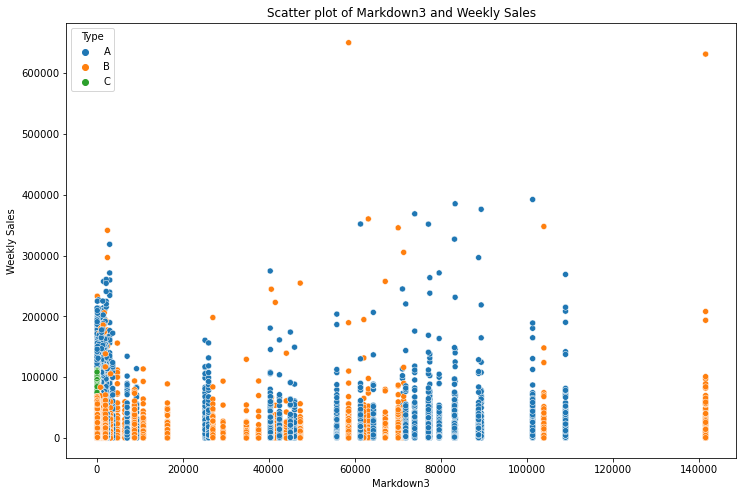

In [40]:
df_temp = dfmark[['MarkDown3','Weekly_Sales',"Type"]]
print(df_temp.describe())
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='MarkDown3', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('Markdown3')
plt.ylabel('Weekly Sales')
plt.title('Scatter plot of Markdown3 and Weekly Sales')

# Show the plot
plt.show()

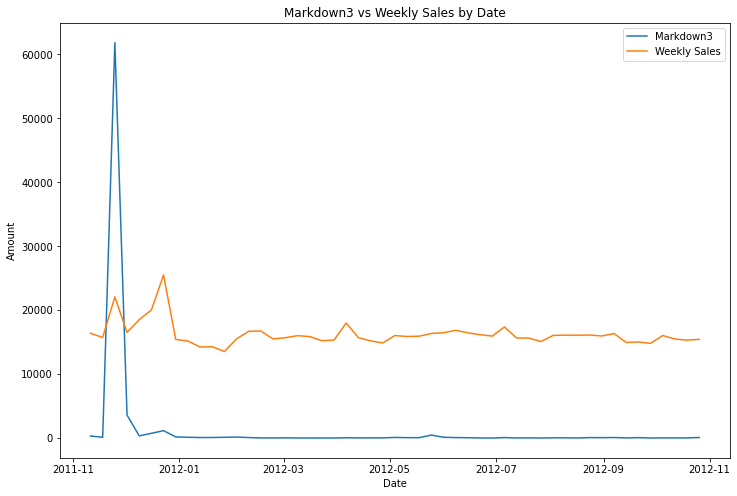

In [41]:
# Calculate the mean of Markdown1 and Weekly Sales for each date
df_temp1 = dfmark.groupby(["Date"])["MarkDown3"].mean()
df_temp2 = dfmark.groupby(["Date"])["Weekly_Sales"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the data
ax.plot(df_temp1.index, df_temp1.values, label="Markdown3")
ax.plot(df_temp2.index, df_temp2.values, label="Weekly Sales")

# Set the axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
ax.set_title("Markdown3 vs Weekly Sales by Date")

# Add a legend
ax.legend()

# Display the plot
plt.show()

           MarkDown4   Weekly_Sales
count  134518.000000  150929.000000
mean     3384.782267   16231.116041
std      6295.136952   23254.154194
min         0.220000       0.010000
25%       504.220000    2038.740000
50%      1481.310000    7585.620000
75%      3595.040000   20481.840000
max     67474.850000  649770.180000


Text(0.5, 1.0, 'Scatter Plot of Markdown4 and Weekly Sales')

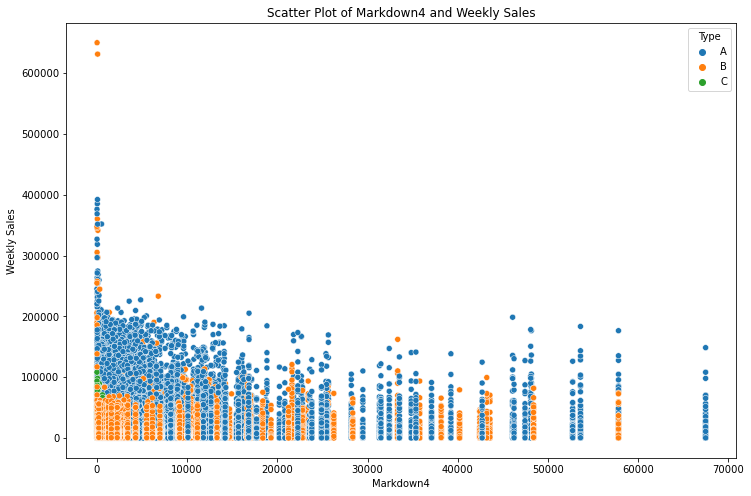

In [42]:
df_temp = dfmark[['MarkDown4','Weekly_Sales',"Type"]]
print(df_temp.describe())
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='MarkDown4', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('Markdown4')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Markdown4 and Weekly Sales')

# Show the plot

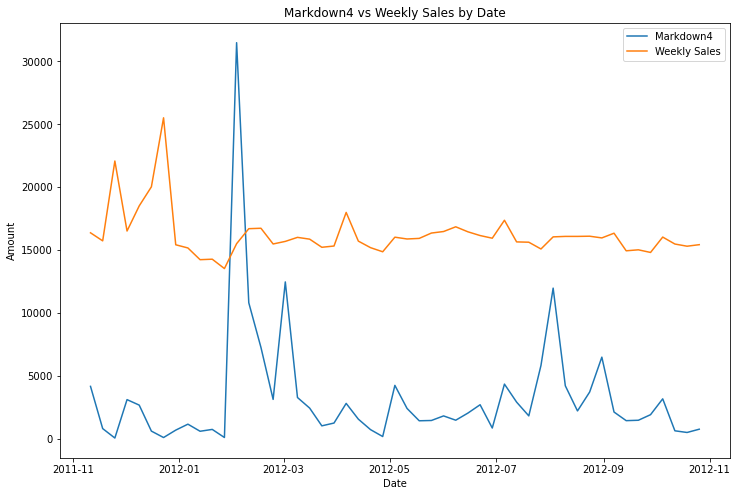

In [43]:
# Calculate the mean of Markdown1 and Weekly Sales for each date
df_temp1 = dfmark.groupby(["Date"])["MarkDown4"].mean()
df_temp2 = dfmark.groupby(["Date"])["Weekly_Sales"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the data
ax.plot(df_temp1.index, df_temp1.values, label="Markdown4")
ax.plot(df_temp2.index, df_temp2.values, label="Weekly Sales")

# Set the axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
ax.set_title("Markdown4 vs Weekly Sales by Date")

# Add a legend
ax.legend()

# Display the plot
plt.show()

           MarkDown5   Weekly_Sales
count  150929.000000  150929.000000
mean     4629.531870   16231.116041
std      5960.171711   23254.154194
min       135.160000       0.010000
25%      1878.440000    2038.740000
50%      3359.450000    7585.620000
75%      5563.800000   20481.840000
max    108519.280000  649770.180000


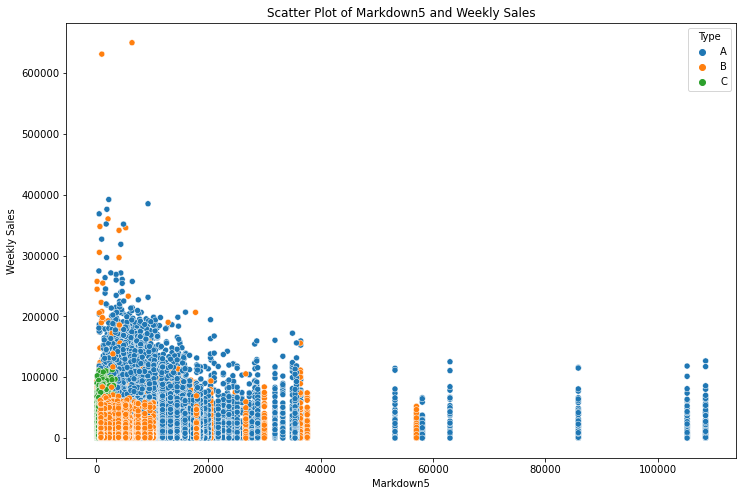

In [44]:
df_temp = dfmark[['MarkDown5','Weekly_Sales',"Type"]]
print(df_temp.describe())
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='MarkDown5', y='Weekly_Sales',hue="Type", data=df_temp)

# Set the axis labels and title
plt.xlabel('Markdown5')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Markdown5 and Weekly Sales')

# Show the plot
plt.show()

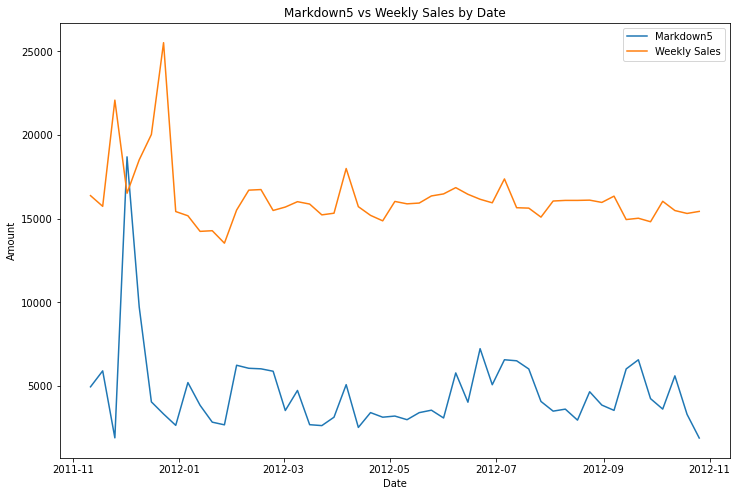

In [45]:
# Calculate the mean of Markdown1 and Weekly Sales for each date
df_temp1 = dfmark.groupby(["Date"])["MarkDown5"].mean()
df_temp2 = dfmark.groupby(["Date"])["Weekly_Sales"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the data
ax.plot(df_temp1.index, df_temp1.values, label="Markdown5")
ax.plot(df_temp2.index, df_temp2.values, label="Weekly Sales")

# Set the axis labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
ax.set_title("Markdown5 vs Weekly Sales by Date")

# Add a legend
ax.legend()

# Display the plot
plt.show()

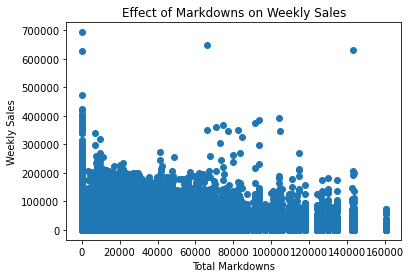

Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales         1.000000   0.085325   0.024565   0.060304   0.045325   
MarkDown1            0.085325   1.000000   0.024601  -0.108189   0.819175   
MarkDown2            0.024565   0.024601   1.000000  -0.050146  -0.007582   
MarkDown3            0.060304  -0.108189  -0.050146   1.000000  -0.071148   
MarkDown4            0.045325   0.819175  -0.007582  -0.071148   1.000000   
MarkDown5            0.090561   0.160412  -0.007410  -0.026475   0.107895   
Total_MarkDowns      0.065374   0.701821   0.430961   0.391984   0.672637   

                 MarkDown5  Total_MarkDowns  
Weekly_Sales      0.090561         0.065374  
MarkDown1         0.160412         0.701821  
MarkDown2        -0.007410         0.430961  
MarkDown3        -0.026475         0.391984  
MarkDown4         0.107895         0.672637  
MarkDown5         1.000000         0.410421  
Total_MarkDowns   0.410421         1.000000

In [46]:
df_markdown_sales = df[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].copy()

# Calculate the total markdowns
df_markdown_sales['Total_MarkDowns'] = df_markdown_sales[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

# Plot the scatter plot
plt.scatter(x=df_markdown_sales['Total_MarkDowns'], y=df_markdown_sales['Weekly_Sales'])
plt.xlabel('Total Markdowns')
plt.ylabel('Weekly Sales')
plt.title('Effect of Markdowns on Weekly Sales')
plt.show()
df_markdown_sales.corr()

We can see that the correlation coefficient between 'Total_MarkDowns' and 'Weekly_Sales' is 0.065347, indicating a very weak positive correlation. The strongest correlation is between 'Total_MarkDowns' and 'MarkDown1', with a coefficient of 0.701821.

The correlation coefficient indicates a very weak positive correlation between Markdowns and weeklysales. It means that there is a slight tendency for an increase in markdown1 to be associated with a slight increase in weekly sales, but the relationship is not very strong.